In [30]:
import pandas as pd

# List the file names for the three days
files = [
    'prices_round_3_day_0.csv',
    'prices_round_3_day_1.csv',
    'prices_round_3_day_2.csv'
]

# Load each CSV file from the directory and store the DataFrames in a list
dfs = [pd.read_csv(f'./round-3-island-data-bottle/{file}', delimiter=';') for file in files]

# Concatenate all DataFrames into one, resetting the index
df_all = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df_all.head())

   day  timestamp                      product  bid_price_1  bid_volume_1  \
0    0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0          19.0   
1    0          0                      DJEMBES      13493.0          72.0   
2    0          0                   CROISSANTS       4321.0         111.0   
3    0          0                         JAMS       6631.0         210.0   
4    0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0          19.0   

   bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          NaN           NaN          NaN           NaN          100   
1          NaN           NaN          NaN           NaN        13494   
2          NaN           NaN          NaN           NaN         4322   
3          NaN           NaN          NaN           NaN         6633   
4          NaN           NaN          NaN           NaN          506   

   ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0            19          NaN   

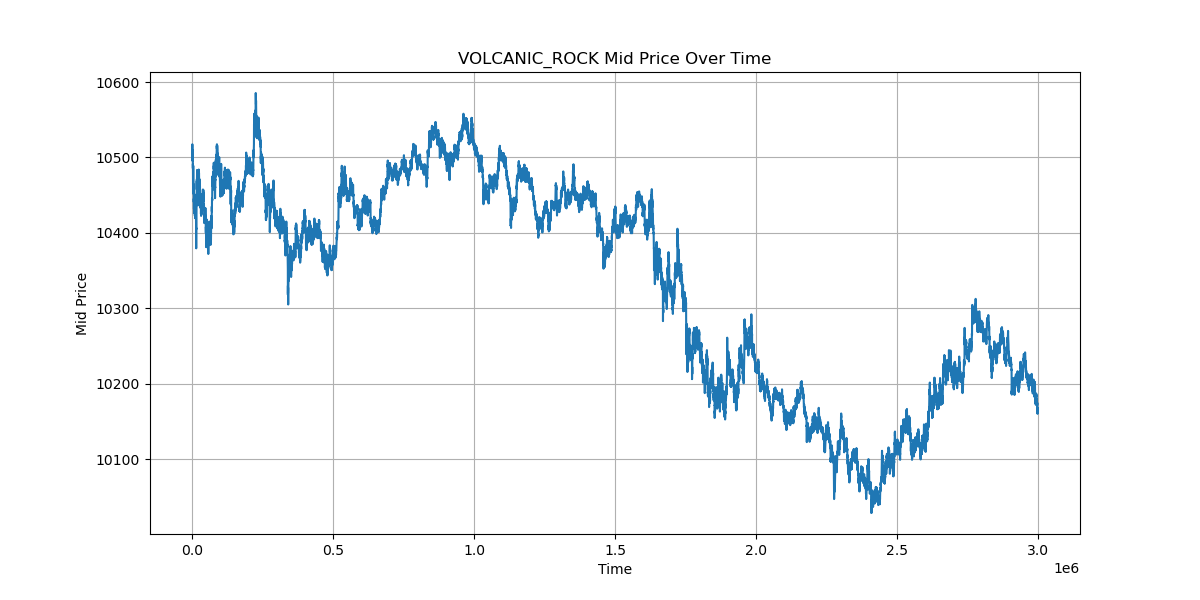

In [78]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

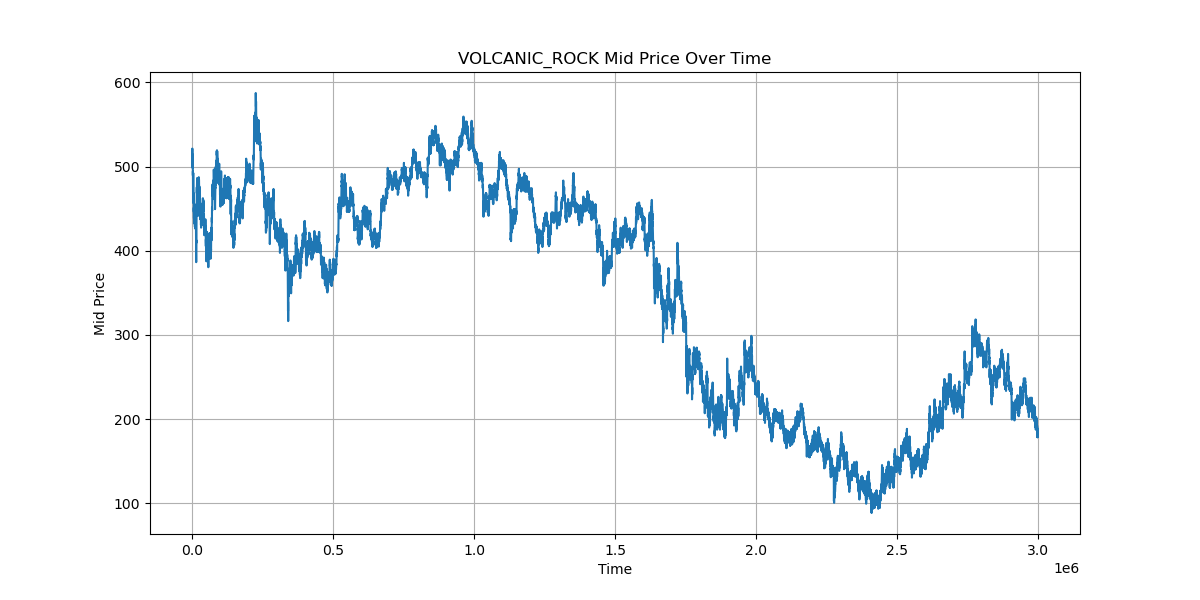

In [79]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

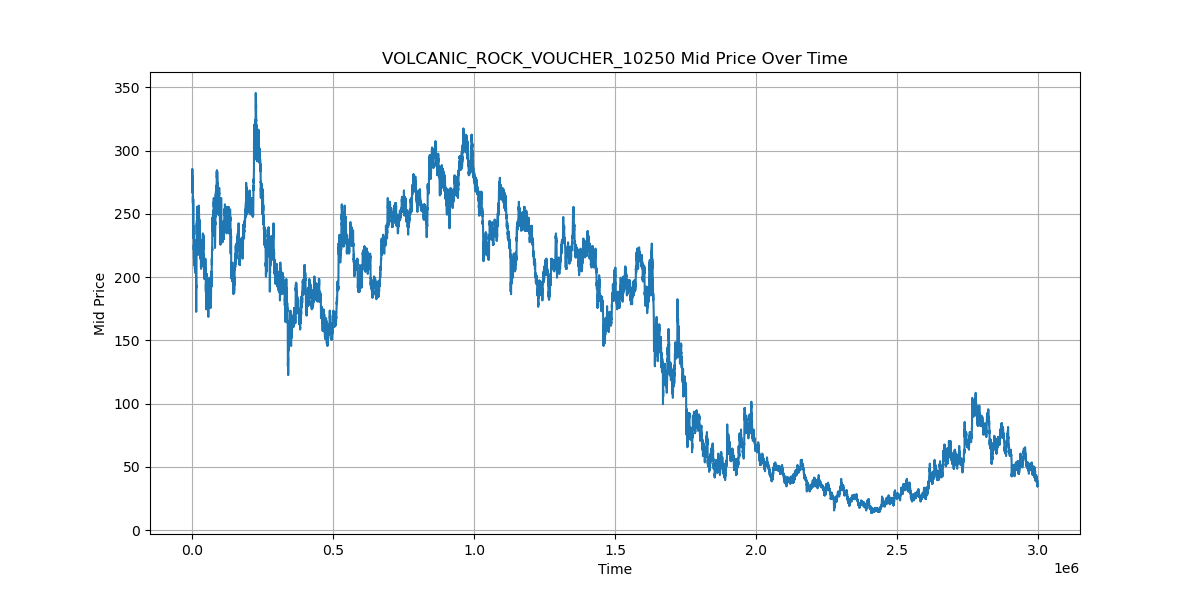

In [84]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK_VOUCHER_10250 Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

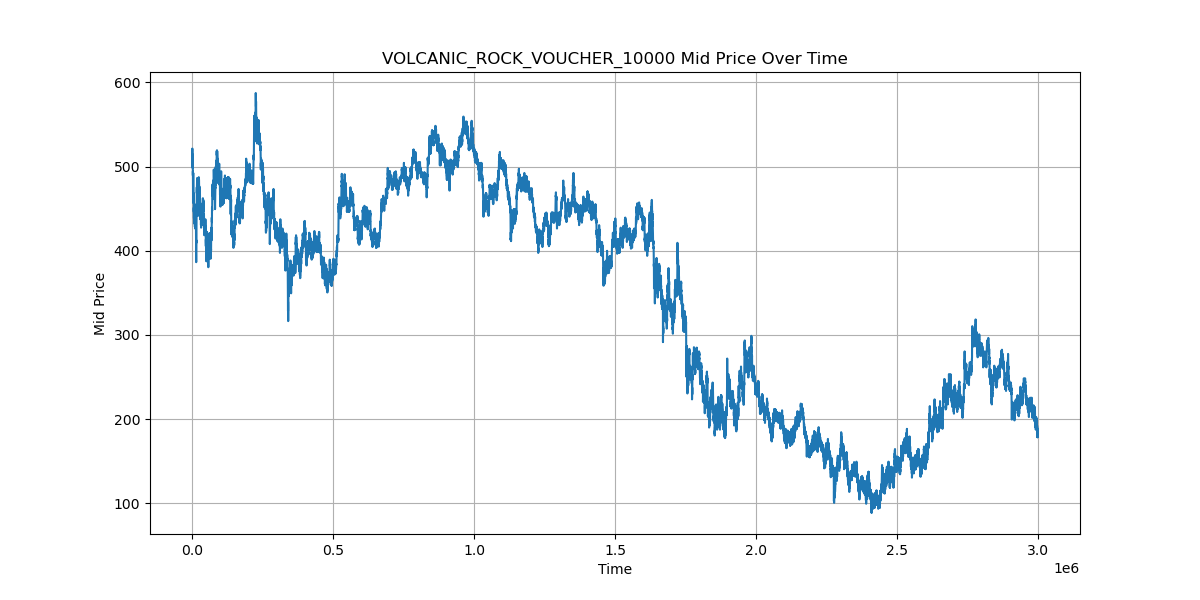

In [85]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK_VOUCHER_10000 Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

<Axes: xlabel='time'>

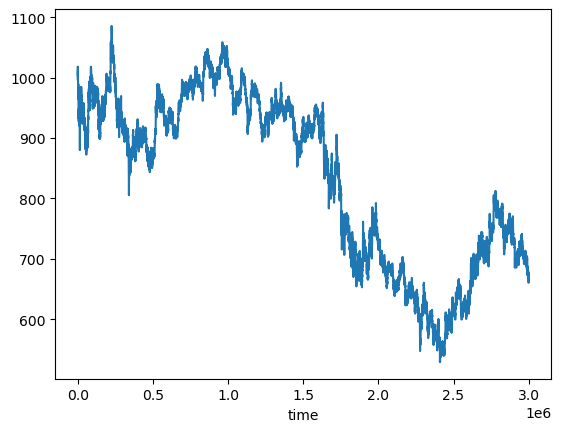

In [44]:
df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['mid_price'].plot()

In [10]:
Voucher10500 = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']

In [11]:
Rock = df_all[df_all['product'] == 'VOLCANIC_ROCK']

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call price function.
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

# Black-Scholes put price function.
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Function to compute implied volatility given an option price,
# choosing the proper pricing function based on the option type.
def implied_volatility(option_price, S, K, T, r, option_type, tol=1e-6, sigma_low=1e-6, sigma_high=5.0):
    def error(sigma):
        if option_type == 'call':
            return black_scholes_call(S, K, T, r, sigma) - option_price
        elif option_type == 'put':
            return black_scholes_put(S, K, T, r, sigma) - option_price
        else:
            raise ValueError("option_type must be 'call' or 'put'")
    return brentq(error, sigma_low, sigma_high, xtol=tol)

# Parameters
T = 7 / 365   # time to maturity in years
r = 0.01      # risk-free interest rate

# Extract the underlying asset ("Rock") mid price.
rock = df_all[df_all['product'] == 'VOLCANIC_ROCK']
S = rock['mid_price'].iloc[0]

# Define voucher products with their strike prices and option types.
# (Adjust these entries so that the key names match the ones in your DataFrame.)
voucher_products = {
    'VOLCANIC_ROCK_VOUCHER_9750': {'strike': 9750, 'option_type': 'call'},
    'VOLCANIC_ROCK_VOUCHER_10000': {'strike': 10000, 'option_type': 'call'},
    'VOLCANIC_ROCK_VOUCHER_10250': {'strike': 10250, 'option_type': 'call'},
    'VOLCANIC_ROCK_VOUCHER_10500': {'strike': 10500, 'option_type': 'call'},
    # Add or adjust entries as needed.
}

# List to store the results.
results = []

# Iterate through each voucher product.
for product, details in voucher_products.items():
    K = details['strike']
    option_type = details['option_type']
    voucher = df_all[df_all['product'] == product]
    if voucher.empty:
        # Skip this product if it doesn't exist in the DataFrame.
        continue

    # Extract the observed mid price for the option.
    option_market_price = voucher['mid_price'].iloc[0]
    
    # Calculate implied volatility.
    try:
        sigma_impl = implied_volatility(option_market_price, S, K, T, r, option_type)
    except Exception as e:
        sigma_impl = np.nan
        print(f"Error computing volatility for product {product}: {e}")
    
    # Calculate d1 and then delta, if volatility was determined.
    if np.isnan(sigma_impl):
        delta = np.nan
    else:
        d1 = (np.log(S/K) + (r + 0.5 * sigma_impl**2) * T) / (sigma_impl * np.sqrt(T))
        if option_type == 'call':
            delta = norm.cdf(d1)
        elif option_type == 'put':
            delta = norm.cdf(d1) - 1
    
    # Append the result.
    results.append({
        'product': product,
        'strike': K,
        'option_type': option_type,
        'option_market_price': option_market_price,
        'implied_volatility': sigma_impl,
        'delta': delta
    })

# Convert the results to a DataFrame and print.
results_df = pd.DataFrame(results)
print(results_df)

Error computing volatility for product VOLCANIC_ROCK_VOUCHER_9750: f(a) and f(b) must have different signs
                       product  strike option_type  option_market_price  \
0   VOLCANIC_ROCK_VOUCHER_9750    9750        call                754.5   
1  VOLCANIC_ROCK_VOUCHER_10000   10000        call                505.5   
2  VOLCANIC_ROCK_VOUCHER_10250   10250        call                273.5   
3  VOLCANIC_ROCK_VOUCHER_10500   10500        call                 99.5   

   implied_volatility     delta  
0                 NaN       NaN  
1            0.148551  0.991918  
2            0.169486  0.855146  
3            0.167162  0.512844  


## Voucher delta

In [34]:
df_all['time'] = df_all['timestamp'] + 10000 * 100 * df_all['day']

In [35]:
df_all.set_index('time', inplace=True)
df_all


day  timestamp                      product  bid_price_1  \
time                                                                
0          0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0   
0          0          0                      DJEMBES      13493.0   
0          0          0                   CROISSANTS       4321.0   
0          0          0                         JAMS       6631.0   
0          0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0   
...      ...        ...                          ...          ...   
2999900    2     999900               PICNIC_BASKET2      30073.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9750        417.0   
2999900    2     999900               PICNIC_BASKET1      58422.0   
2999900    2     999900                   CROISSANTS       4241.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9500        666.0   

         bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
time                                                                          
0                19.0          NaN           NaN          NaN           NaN   
0                72.0          NaN           NaN          NaN           NaN   
0               111.0          NaN           NaN          NaN           NaN   
0               210.0          NaN           NaN          NaN           NaN   
0                19.0          NaN           NaN          NaN           NaN   
...               ...          ...           ...          ...           ...   
2999900           1.0      30072.0          39.0          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   
2999900           1.0      58421.0          39.0          NaN           NaN   
2999900         143.0          NaN           NaN          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   

         ask_price_1  ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
time                                                                         
0                100            19          NaN           NaN          NaN   
0              13494            72          NaN           NaN          NaN   
0               4322           111          NaN           NaN          NaN   
0               6633           210          NaN           NaN          NaN   
0                506            19          NaN           NaN          NaN   
...              ...           ...          ...           ...          ...   
2999900        30078            20      30079.0          20.0          NaN   
2999900          418            20          NaN           NaN          NaN   
2999900        58432            20      58433.0          20.0          NaN   
2999900         4242           143          NaN           NaN          NaN   
2999900          667            20          NaN           NaN          NaN   

         ask_volume_3  mid_price  profit_and_loss  
time                                               
0                 NaN       99.5              0.0  
0                 NaN    13493.5              0.0  
0                 NaN     4321.5              0.0  
0                 NaN     6632.0              0.0  
0                 NaN      505.5              0.0  
...               ...        ...              ...  
2999900           NaN    30075.5              0.0  
2999900           NaN      417.5              0.0  
2999900           NaN    58427.0              0.0  
2999900           NaN     4241.5              0.0  
2999900           NaN      666.5              0.0  

[420000 rows x 17 columns]

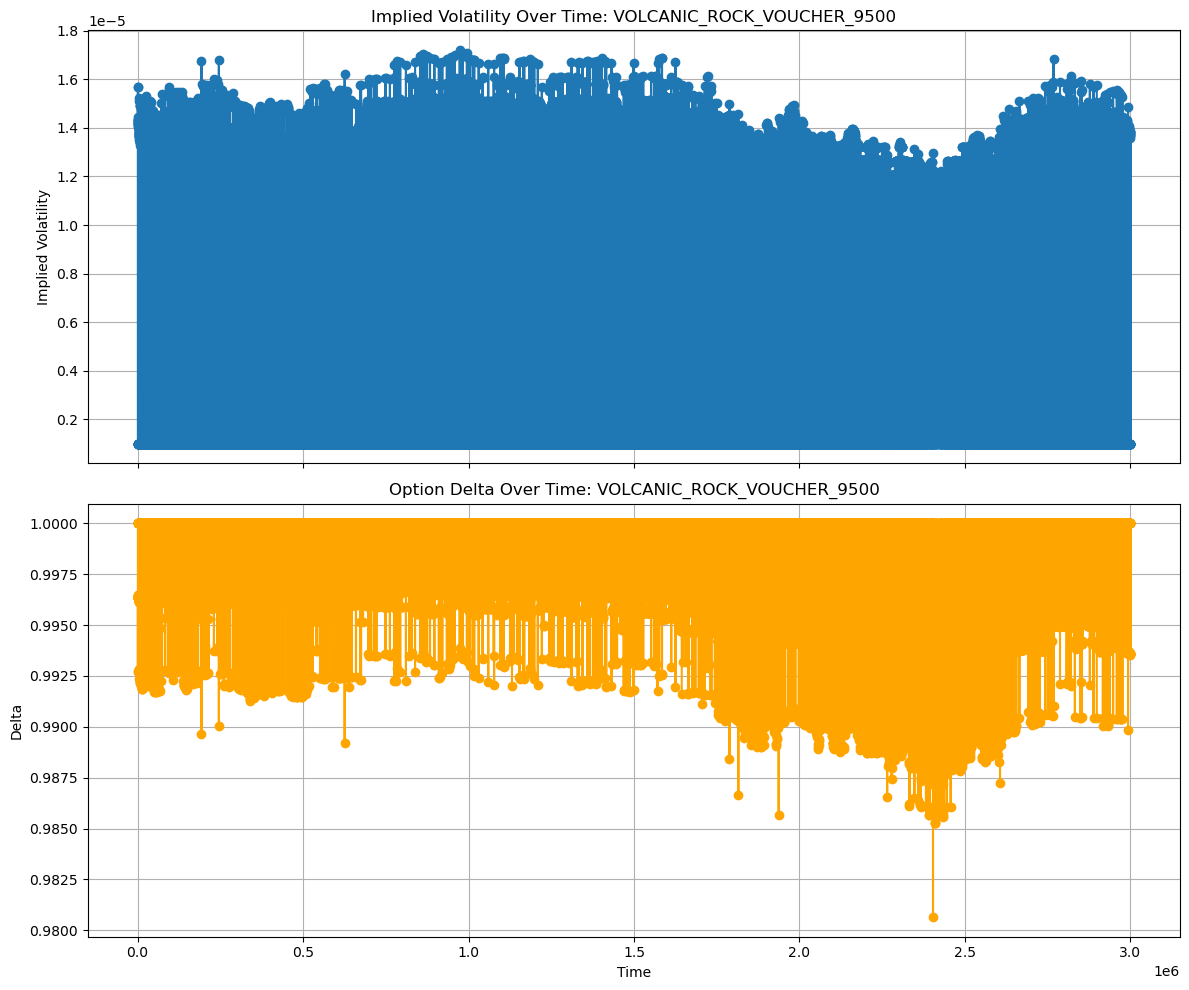

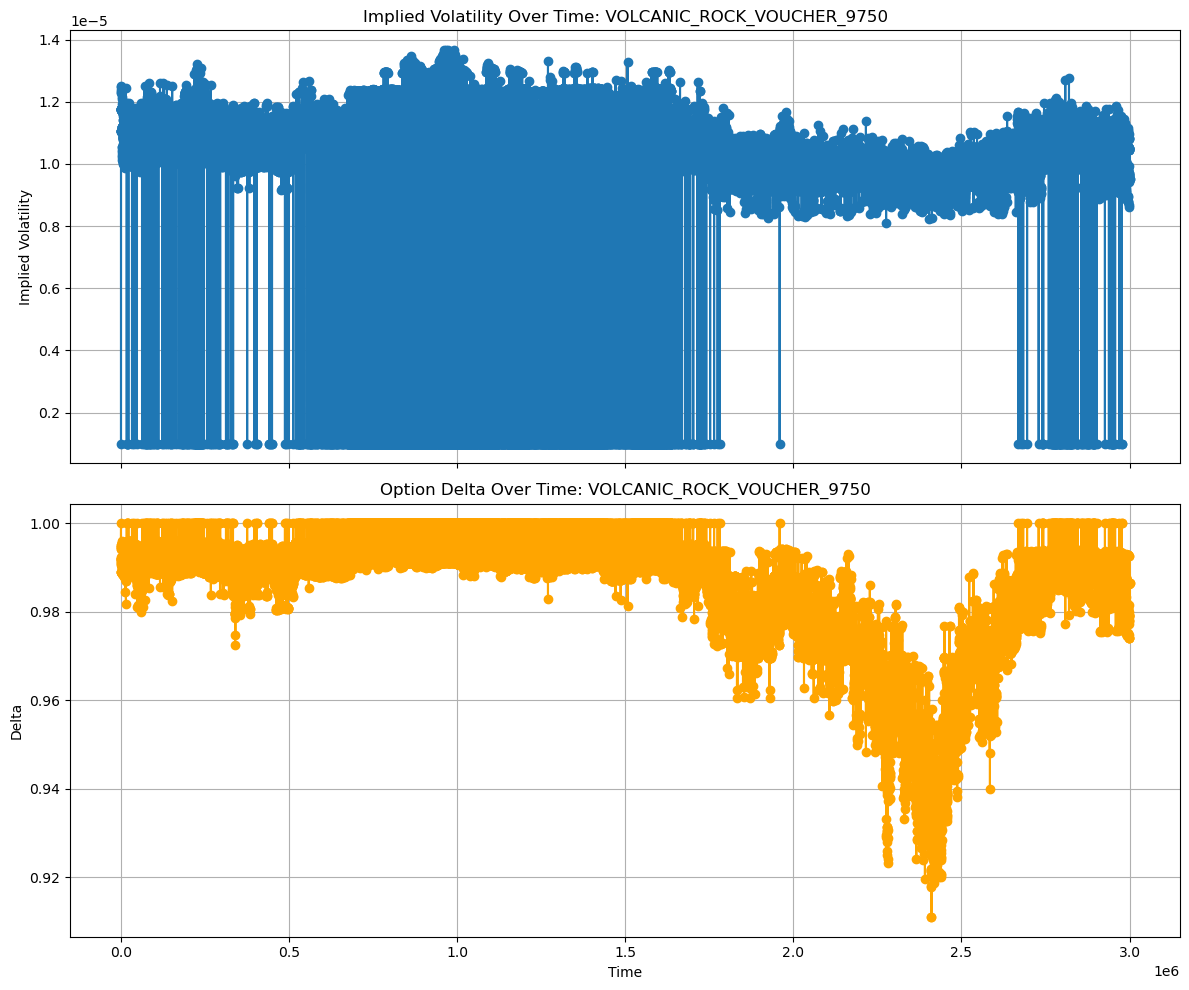

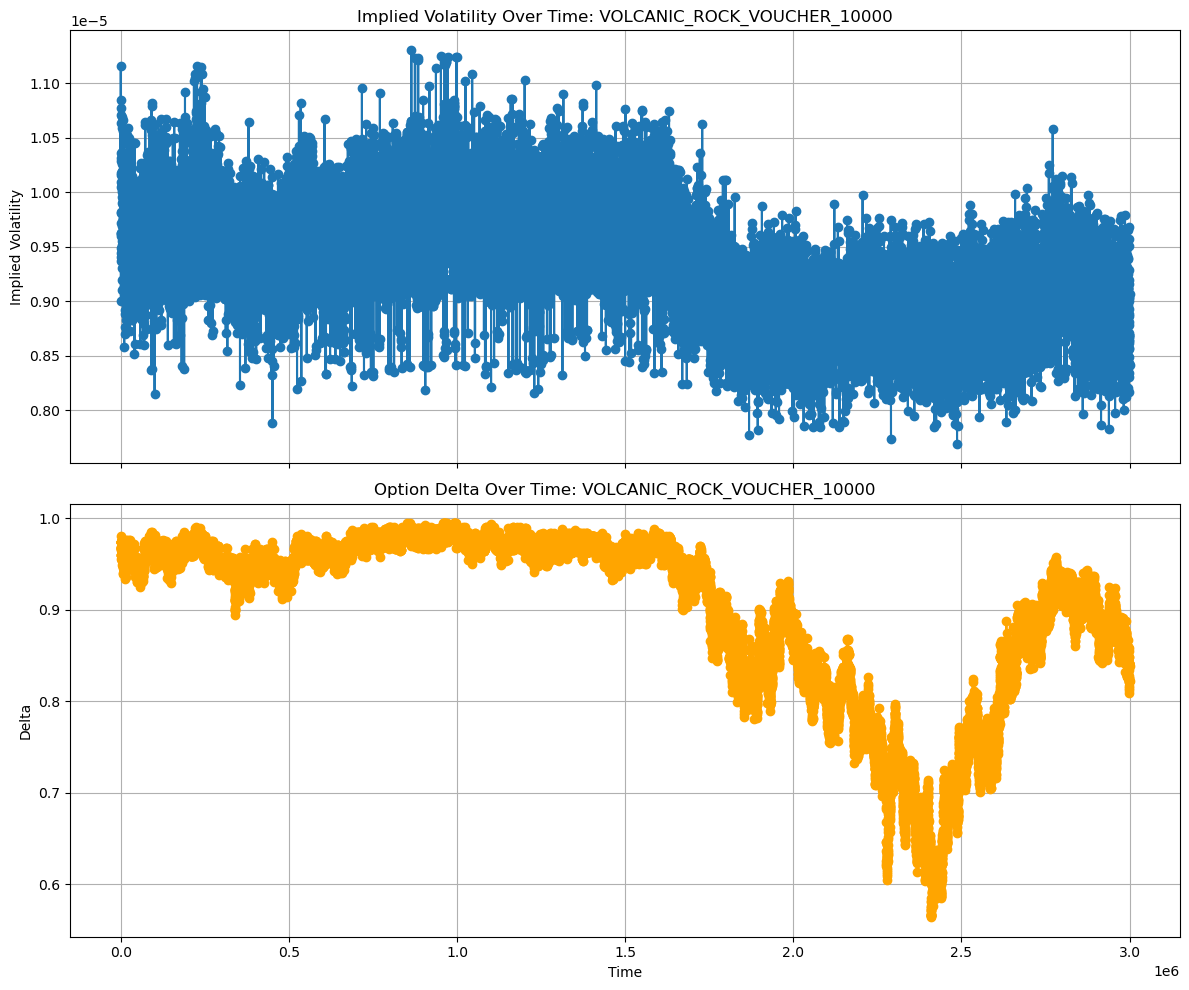

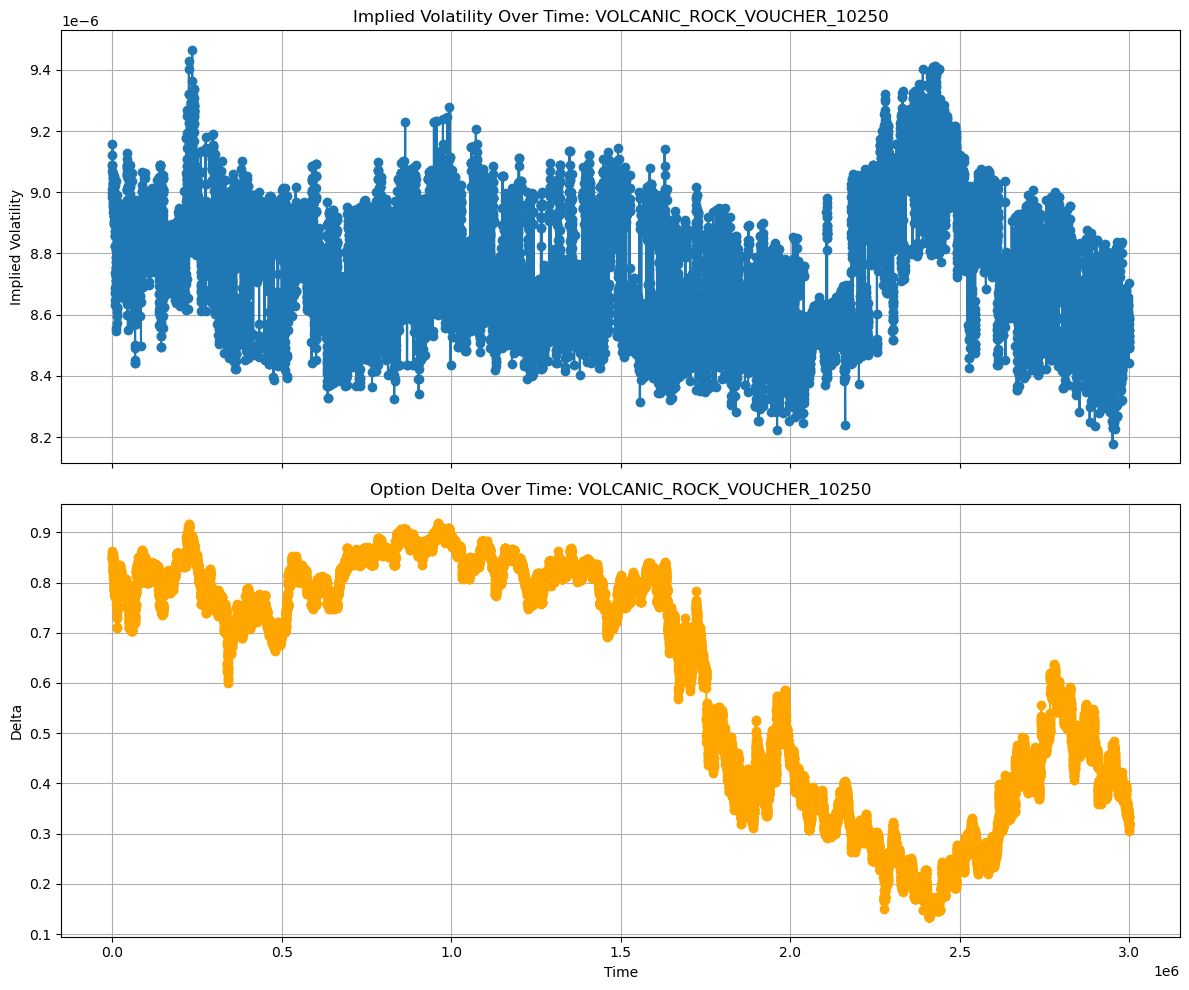

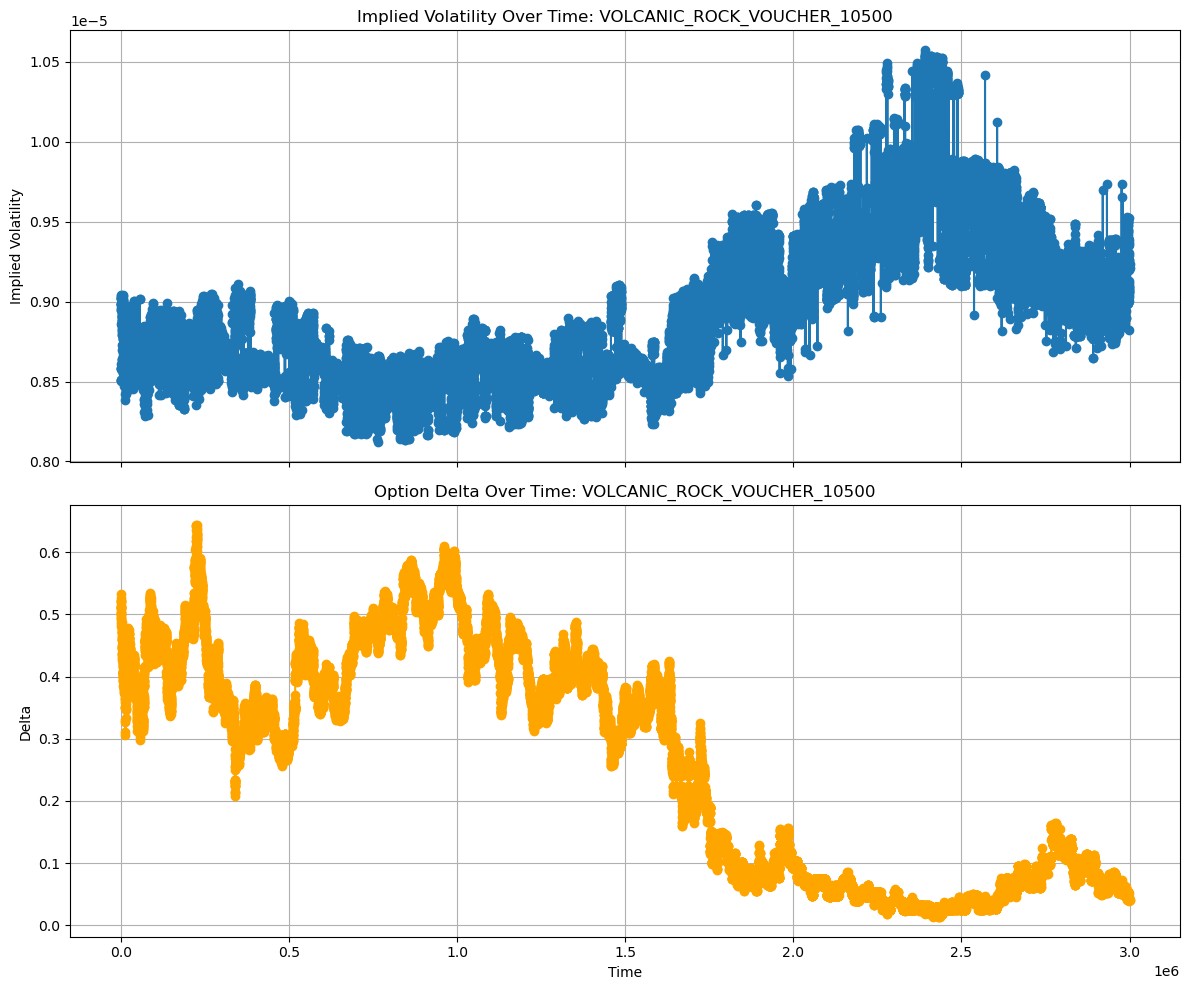

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-6):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-6, 5.0, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500),
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750),
    ('VOLCANIC_ROCK_VOUCHER_10000', 10000),
    ('VOLCANIC_ROCK_VOUCHER_10250', 10250),
    ('VOLCANIC_ROCK_VOUCHER_10500', 10500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

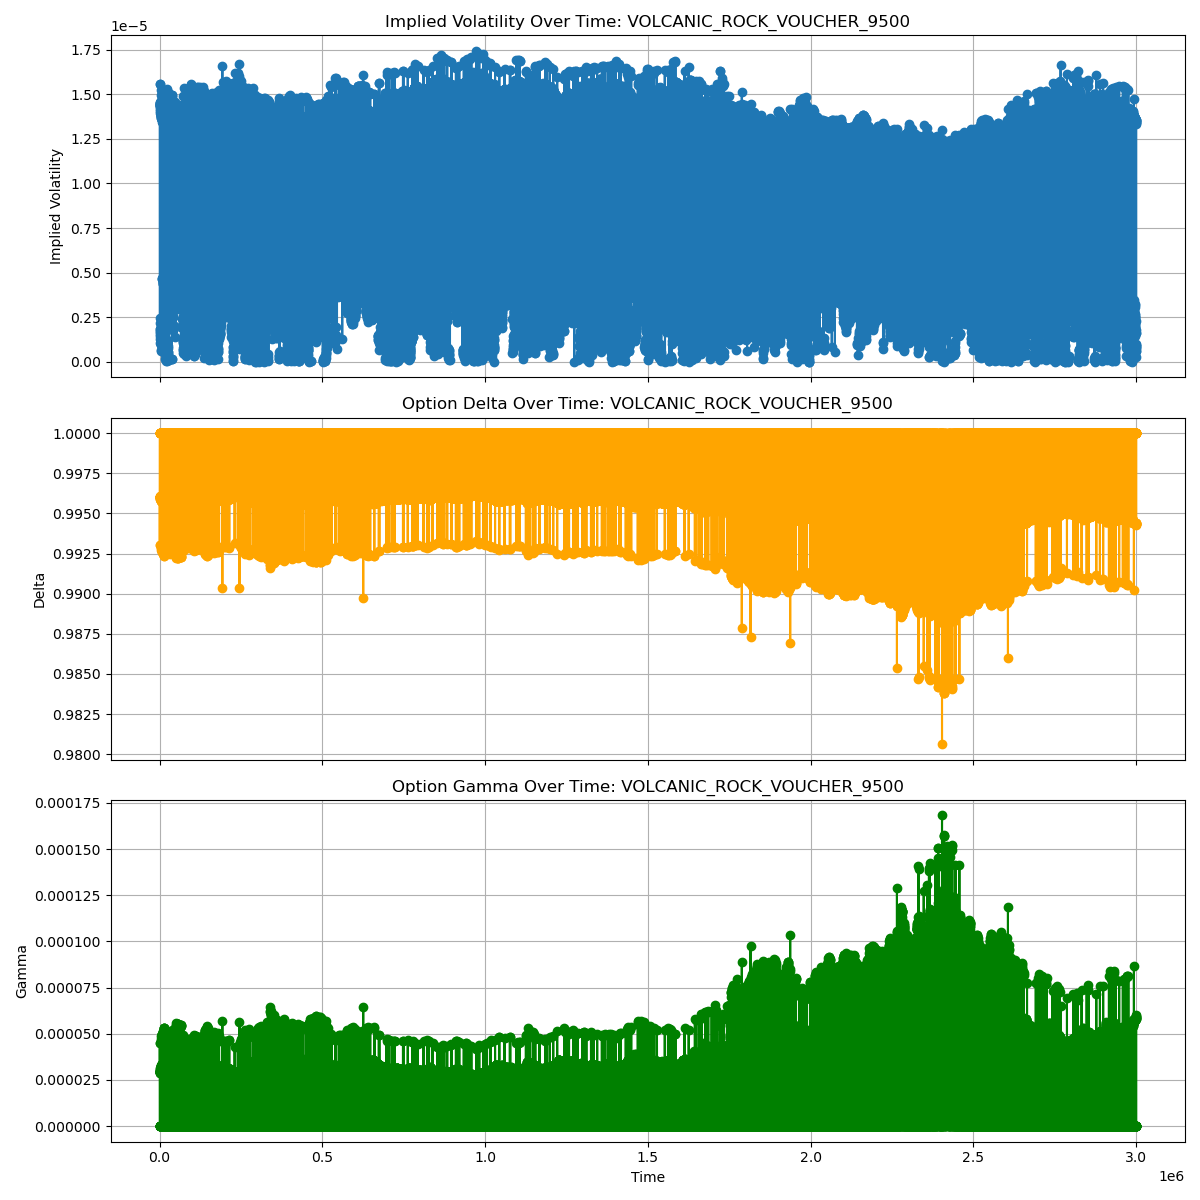

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-11):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, -1, 1e-4, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# --- Added function to compute gamma --- 
def call_gamma(S, K, T, r, sigma):
    """
    Compute the call option gamma from the Black-Scholes formula.
    
    Gamma is given by:
    
      gamma = N'(d1) / (S * sigma * sqrt(T))
    
    where N'(d1) is the standard normal probability density.
    """
    if T <= 0 or sigma == 0:
        return 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))
# --- End addition ---

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV, delta, and gamma.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility, delta, and gamma.
    iv_list = []
    delta_list = []
    gamma_list = []  # --- Added gamma list ---
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
            gamma_list.append(np.nan)  # --- Append nan if sigma is not valid ---
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
            gamma_list.append(call_gamma(S, K, T, r, sigma_imp))  # --- Compute gamma ---
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    data['gamma'] = gamma_list  # --- Add gamma to the DataFrame ---
    
    # Filter out rows where implied volatility is zero (or nearly zero)
    data = data[data['implied_vol'] > 1e-9]
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].grid(True)

    # --- Added Gamma plot ---
    axes[2].plot(data.index, data['gamma'], marker='o', linestyle='-', color='green')
    axes[2].set_title(f'Option Gamma Over Time: {product}')
    axes[2].set_ylabel('Gamma')
    axes[2].set_xlabel('Time')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

In [154]:
df_all

day  timestamp                      product  bid_price_1  \
time                                                                
0          0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0   
0          0          0                      DJEMBES      13493.0   
0          0          0                   CROISSANTS       4321.0   
0          0          0                         JAMS       6631.0   
0          0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0   
...      ...        ...                          ...          ...   
2999900    2     999900               PICNIC_BASKET2      30073.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9750        417.0   
2999900    2     999900               PICNIC_BASKET1      58422.0   
2999900    2     999900                   CROISSANTS       4241.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9500        666.0   

         bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
time                                                                          
0                19.0          NaN           NaN          NaN           NaN   
0                72.0          NaN           NaN          NaN           NaN   
0               111.0          NaN           NaN          NaN           NaN   
0               210.0          NaN           NaN          NaN           NaN   
0                19.0          NaN           NaN          NaN           NaN   
...               ...          ...           ...          ...           ...   
2999900           1.0      30072.0          39.0          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   
2999900           1.0      58421.0          39.0          NaN           NaN   
2999900         143.0          NaN           NaN          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   

         ask_price_1  ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
time                                                                         
0                100            19          NaN           NaN          NaN   
0              13494            72          NaN           NaN          NaN   
0               4322           111          NaN           NaN          NaN   
0               6633           210          NaN           NaN          NaN   
0                506            19          NaN           NaN          NaN   
...              ...           ...          ...           ...          ...   
2999900        30078            20      30079.0          20.0          NaN   
2999900          418            20          NaN           NaN          NaN   
2999900        58432            20      58433.0          20.0          NaN   
2999900         4242           143          NaN           NaN          NaN   
2999900          667            20          NaN           NaN          NaN   

         ask_volume_3  mid_price  profit_and_loss  
time                                               
0                 NaN       99.5              0.0  
0                 NaN    13493.5              0.0  
0                 NaN     4321.5              0.0  
0                 NaN     6632.0              0.0  
0                 NaN      505.5              0.0  
...               ...        ...              ...  
2999900           NaN    30075.5              0.0  
2999900           NaN      417.5              0.0  
2999900           NaN    58427.0              0.0  
2999900           NaN     4241.5              0.0  
2999900           NaN      666.5              0.0  

[420000 rows x 17 columns]

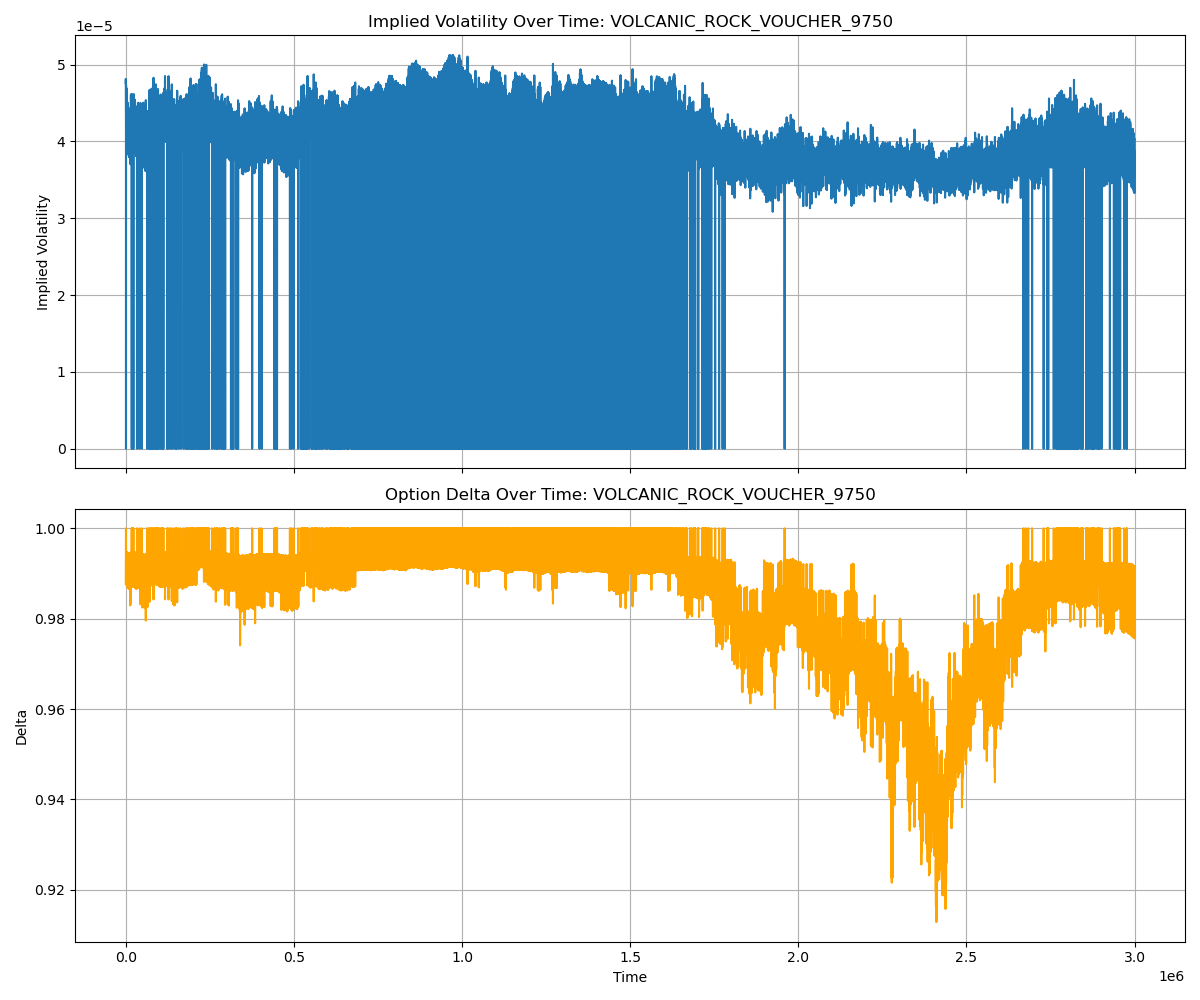

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-8):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-8, 1e-4, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)/ 10000 * 100 * 7
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    
    # Filter out rows where implied volatility is zero (or nearly zero)
    #data = data[data['implied_vol'] > 1e-6]
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'],  linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'],  linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

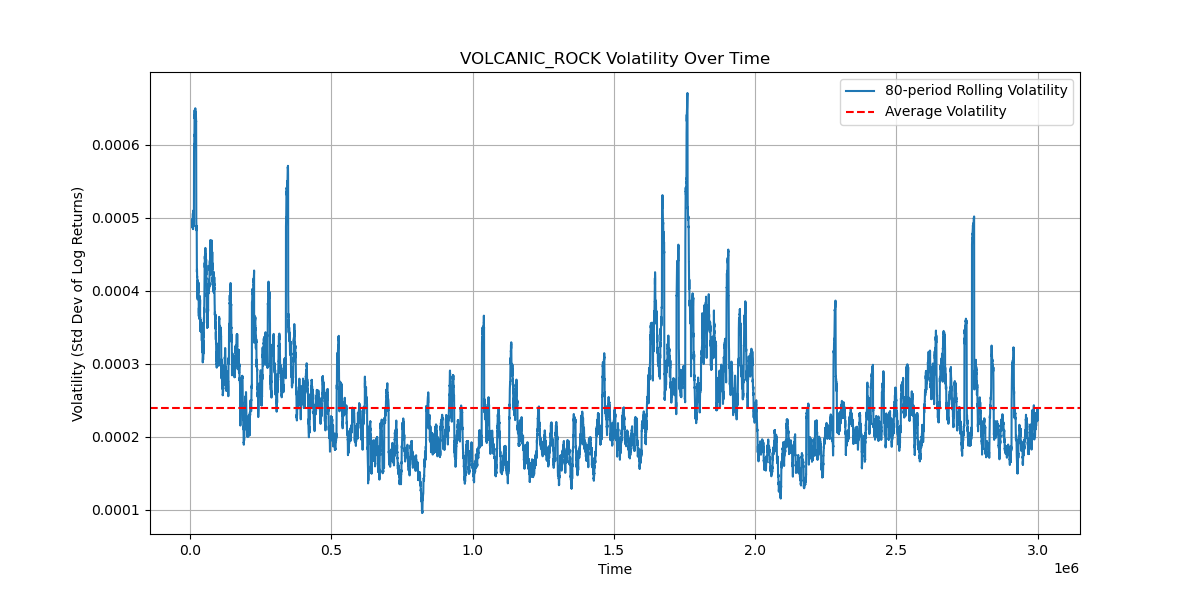

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock = df_all[df_all['product'] == 'VOLCANIC_ROCK'].copy()

# Ensure the DataFrame index is a datetime if it's not already.
# Uncomment the next line if necessary:
# volcanic_rock.index = pd.to_datetime(volcanic_rock.index)

# Calculate the log returns of the mid_price.
volcanic_rock['log_return'] = np.log(volcanic_rock['mid_price']).diff()

# Define the rolling window size, for example, 60 periods.
window_size = 80

# Calculate the rolling standard deviation of the log returns as a measure of volatility.
volcanic_rock['volatility'] = volcanic_rock['log_return'].rolling(window=window_size).std()

# Calculate the overall average volatility from the rolling volatility.
average_volatility = volcanic_rock['volatility'].mean()

# Create the plot for volatility.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock.index, volcanic_rock['volatility'], linestyle='-', label=f'{window_size}-period Rolling Volatility')

# Plot the average volatility line.
plt.axhline(average_volatility, color='red', linestyle='--', label='Average Volatility')

plt.title('VOLCANIC_ROCK Volatility Over Time')
plt.xlabel('Time')
plt.ylabel('Volatility (Std Dev of Log Returns)')
plt.legend()
plt.grid(True)
plt.show()

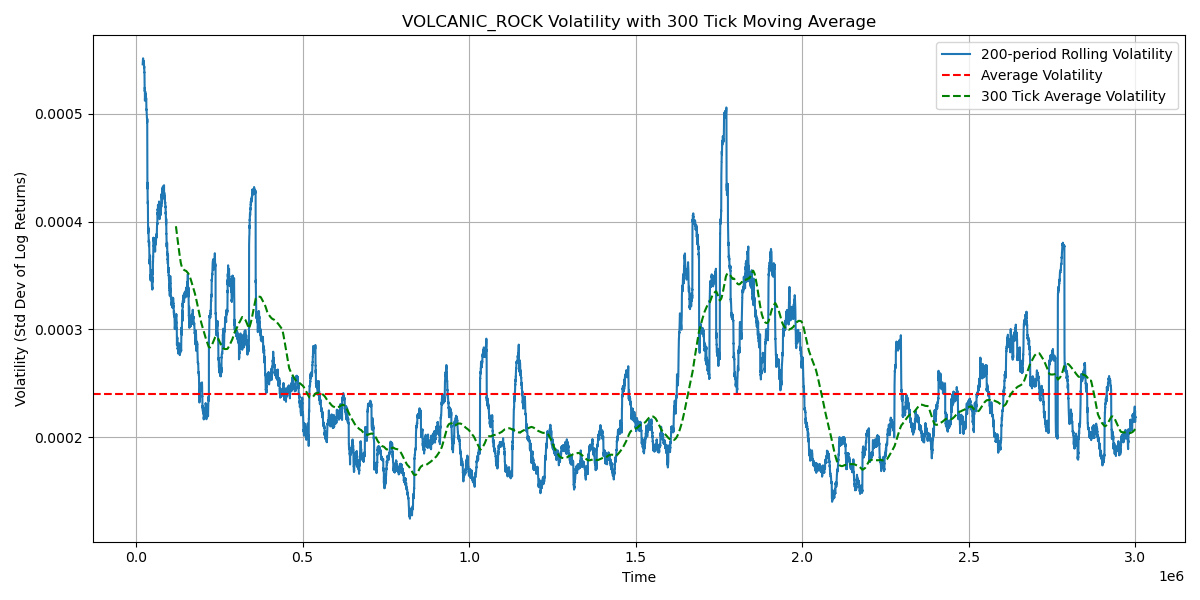

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock = df_all[df_all['product'] == 'VOLCANIC_ROCK'].copy()

# Ensure the DataFrame index is a datetime if it's not already.
# Uncomment the next line if necessary:
# volcanic_rock.index = pd.to_datetime(volcanic_rock.index)

# Calculate the log returns of the mid_price.
volcanic_rock['log_return'] = np.log(volcanic_rock['mid_price']).diff()

# Define the rolling window size for volatility calculation, e.g., 60 periods.
window_size = 200

# Calculate the rolling standard deviation of the log returns as a measure of volatility.
volcanic_rock['volatility'] = volcanic_rock['log_return'].rolling(window=window_size).std()

# Calculate the overall average volatility from the rolling volatility.
average_volatility = volcanic_rock['volatility'].mean()

# Calculate the 300 tick moving average of the volatility.
volcanic_rock['300_tick_avg_vol'] = volcanic_rock['volatility'].rolling(window=1000).mean()

# Create the plot.
plt.figure(figsize=(12, 6))

# Plot the calculated volatility.
plt.plot(volcanic_rock.index, volcanic_rock['volatility'], linestyle='-', label=f'{window_size}-period Rolling Volatility')

# Plot the overall average volatility as a horizontal line.
plt.axhline(average_volatility, color='red', linestyle='--', label='Average Volatility')

# Plot the 300 tick moving average of the volatility.
plt.plot(volcanic_rock.index, volcanic_rock['300_tick_avg_vol'], color='green', linestyle='--', label='300 Tick Average Volatility')

plt.title('VOLCANIC_ROCK Volatility with 300 Tick Moving Average')
plt.xlabel('Time')
plt.ylabel('Volatility (Std Dev of Log Returns)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/757091081.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/757091081.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/757091081.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


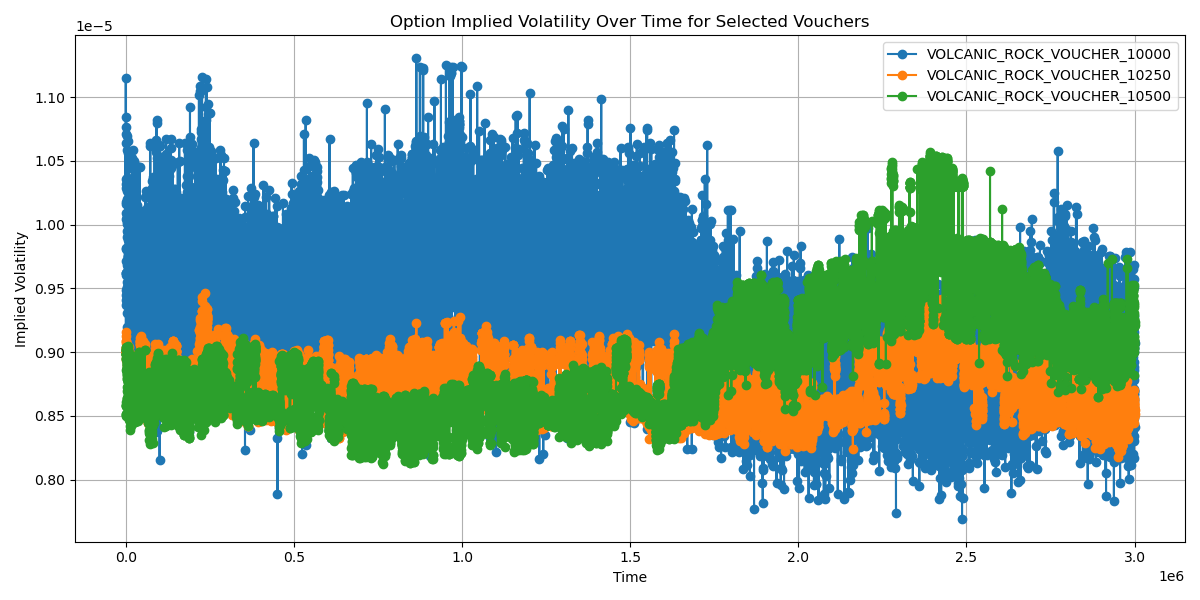

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

fig, ax = plt.subplots(figsize=(12, 6))

# Loop over selected products, load the CSV file, and plot the implied volatility values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Optionally remove rows with zero implied_vol values.
    data = data[data['implied_vol'] != 0]
    
    ax.plot(data.index, data['implied_vol'], marker='o', linestyle='-', label=product)

ax.set_title('Option Implied Volatility Over Time for Selected Vouchers')
ax.set_ylabel('Implied Volatility')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-6):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-6, 5.0, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500),
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750),
    ('VOLCANIC_ROCK_VOUCHER_10000', 10000),
    ('VOLCANIC_ROCK_VOUCHER_10250', 10250),
    ('VOLCANIC_ROCK_VOUCHER_10500', 10500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Define threshold for delta plot filtering (adjust as needed).
threshold = 0.1

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list

    # --- Record Values ---
    # Save computed implied volatility and delta values to a CSV file.
    data.to_csv(f"{product}_iv_delta_record.csv")
    
    # --- Prepare data for plotting: filter out zero values ---
    plot_data_iv = data[data['implied_vol'] != 0]
    plot_data_delta = data[(data['delta'] != 0) & 
                           (data['delta'] > (0.5 - threshold)) & 
                           (data['delta'] < (0.5 + threshold))]
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(plot_data_iv.index, plot_data_iv['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(plot_data_delta.index, plot_data_delta['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 

## Choosing a threshold 

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1292933980.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1292933980.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1292933980.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


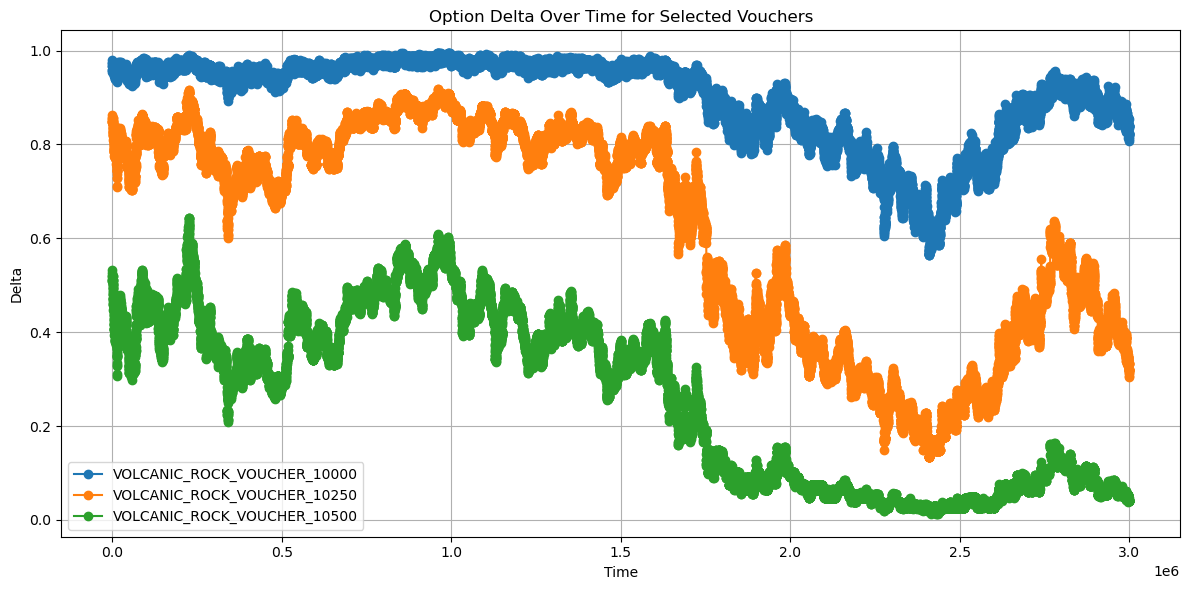

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

fig, ax = plt.subplots(figsize=(12, 6))

# Loop over selected products, load the CSV file, and plot the delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Optionally remove rows with zero delta values.
    data = data[data['delta'] != 0]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


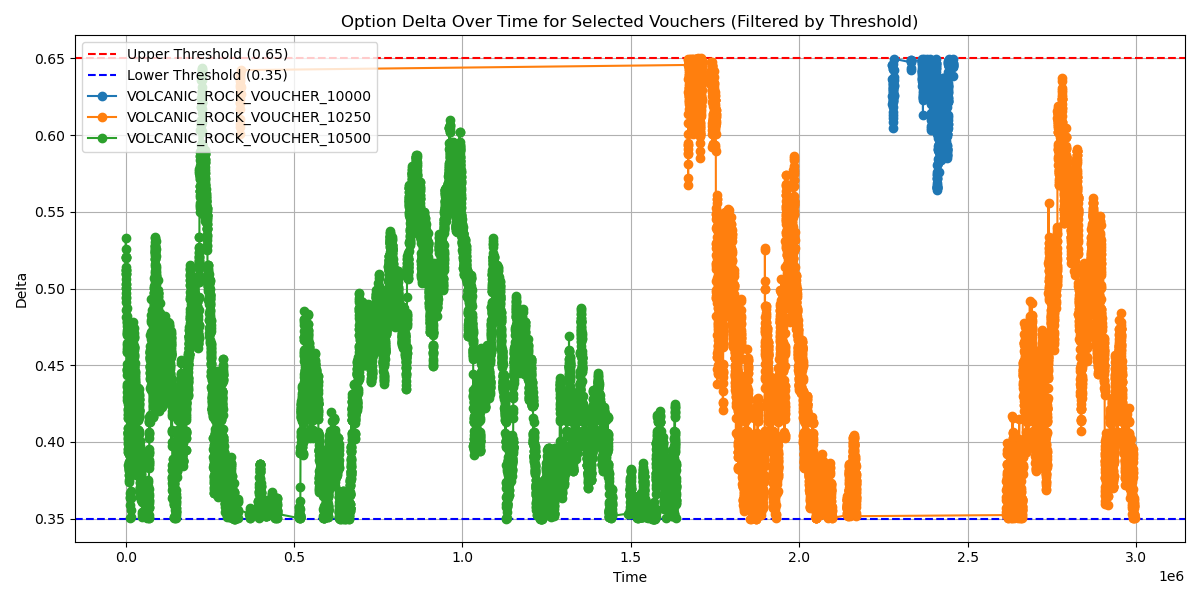

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the delta thresholds.
thresholdup = 0.15  # upper threshold adjustment
thresholddown = 0.15  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


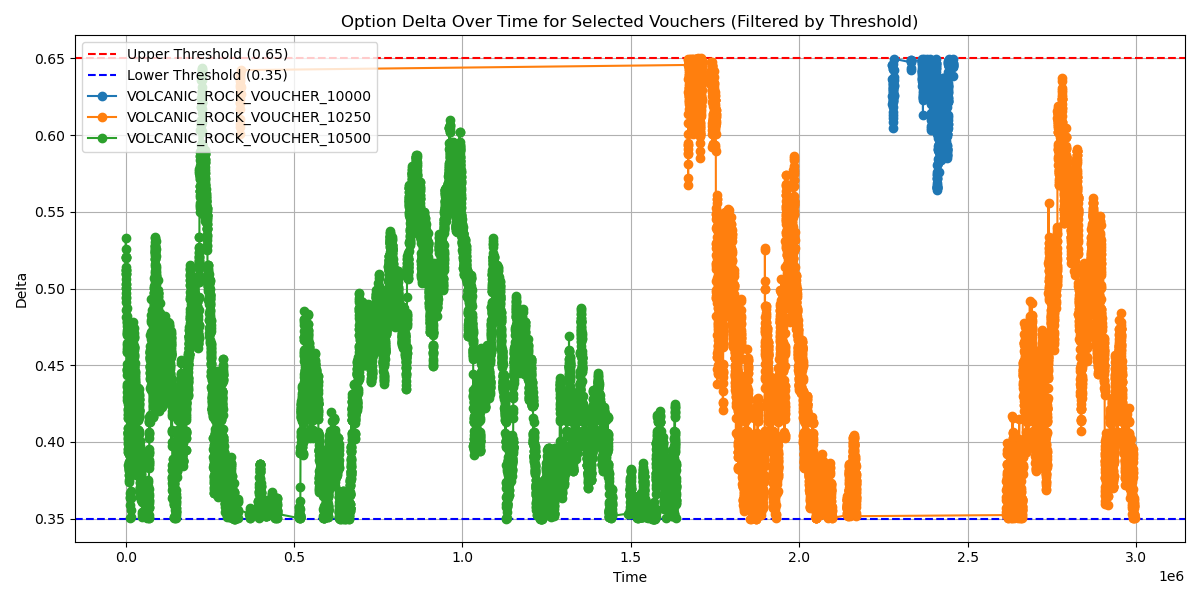

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the delta thresholds.
thresholdup = 0.15  # upper threshold adjustment
thresholddown = 0.15  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1882107104.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1882107104.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1882107104.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, index_col=0, parse_dates=True)


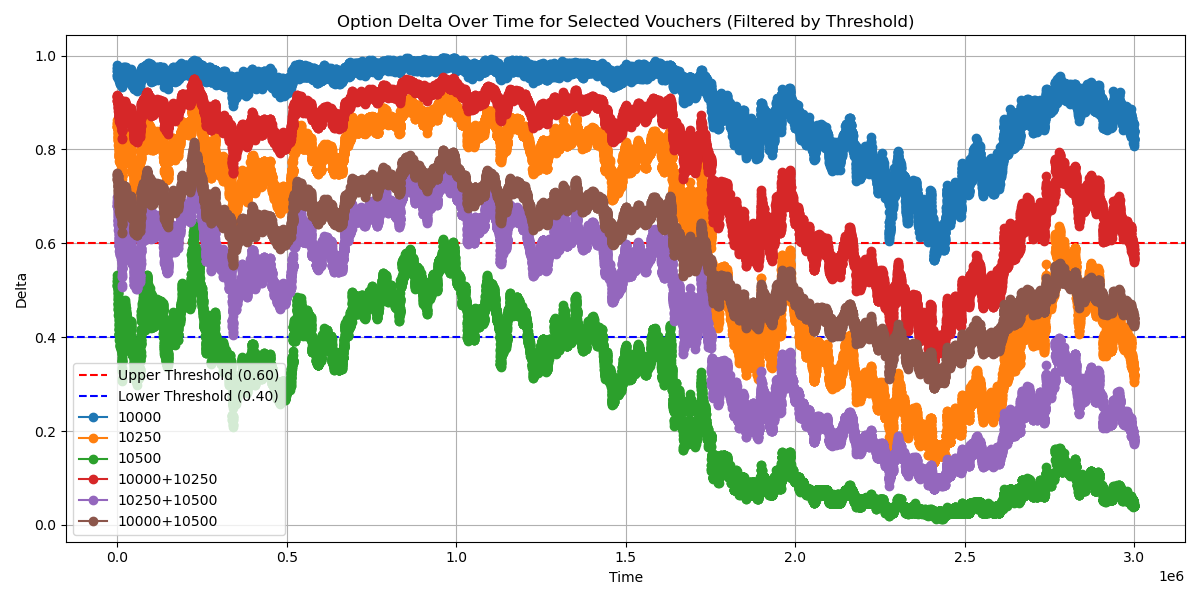

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the delta thresholds.
thresholdup = 0.10  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
# Loop over selected products, load the CSV file, and store the dataframe in the list.
data_voucher = []
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=True)
    data_voucher.append(df)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    #ax.plot(data_voucher[i].index, data_voucher[i]['delta'], marker='o', linestyle='-', label=product)
ax.plot(data_voucher[0].index, data_voucher[0]['delta'], marker='o', linestyle='-', label='10000') 
ax.plot(data_voucher[1].index, data_voucher[1]['delta'], marker='o', linestyle='-', label='10250') 
ax.plot(data_voucher[2].index, data_voucher[2]['delta'], marker='o', linestyle='-', label='10500') 
ax.plot(data_voucher[0].index, (data_voucher[0]['delta']+data_voucher[1]['delta'])/2, marker='o', linestyle='-', label='10000+10250')
ax.plot(data_voucher[0].index, (data_voucher[1]['delta']+data_voucher[2]['delta'])/2, marker='o', linestyle='-', label='10250+10500')
ax.plot(data_voucher[0].index, (data_voucher[0]['delta']+data_voucher[2]['delta'])/2, marker='o', linestyle='-', label='10000+10500')
ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [55]:
%matplotlib ipympl

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/2781415165.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


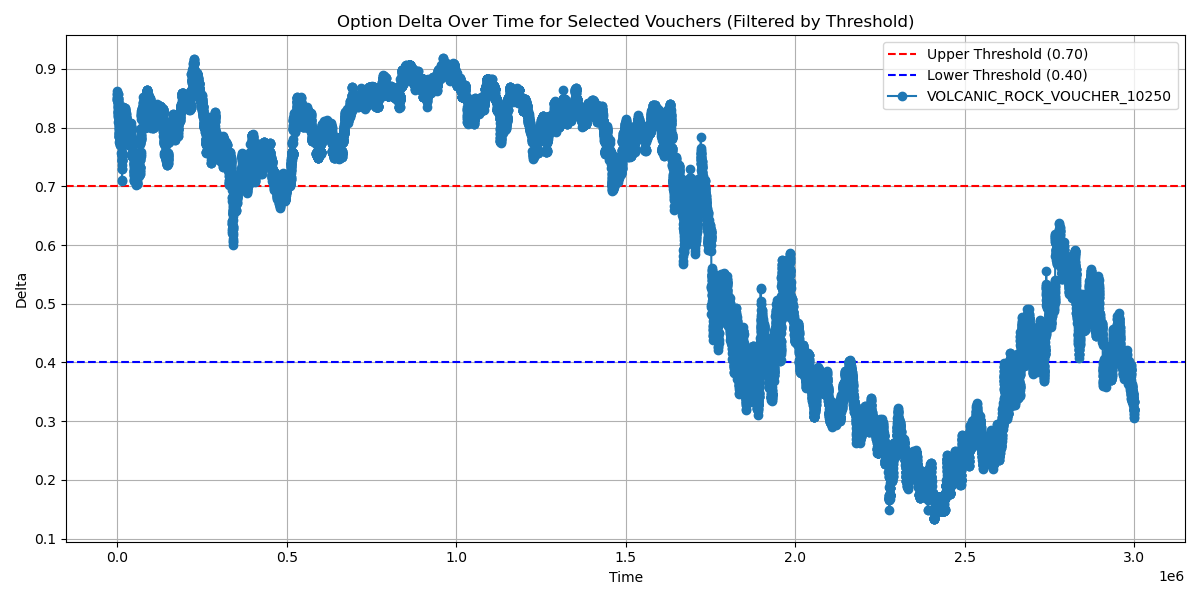

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10250']

# Define the delta thresholds.
thresholdup = 0.20  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/204230039.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


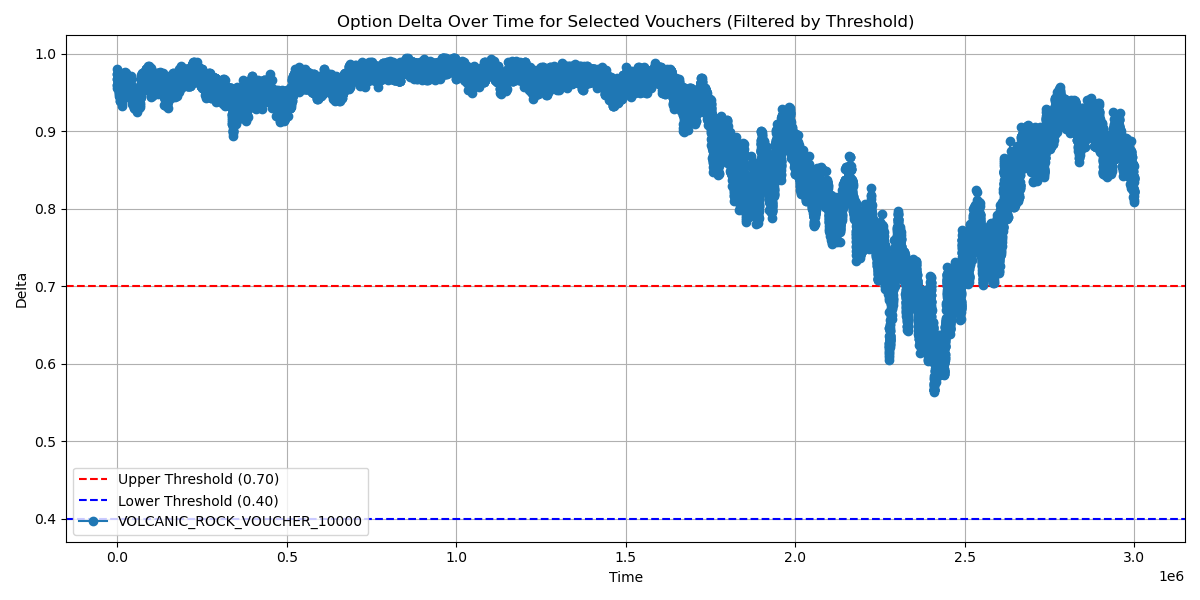

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000']

# Define the delta thresholds.
thresholdup = 0.20  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/3190651793.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


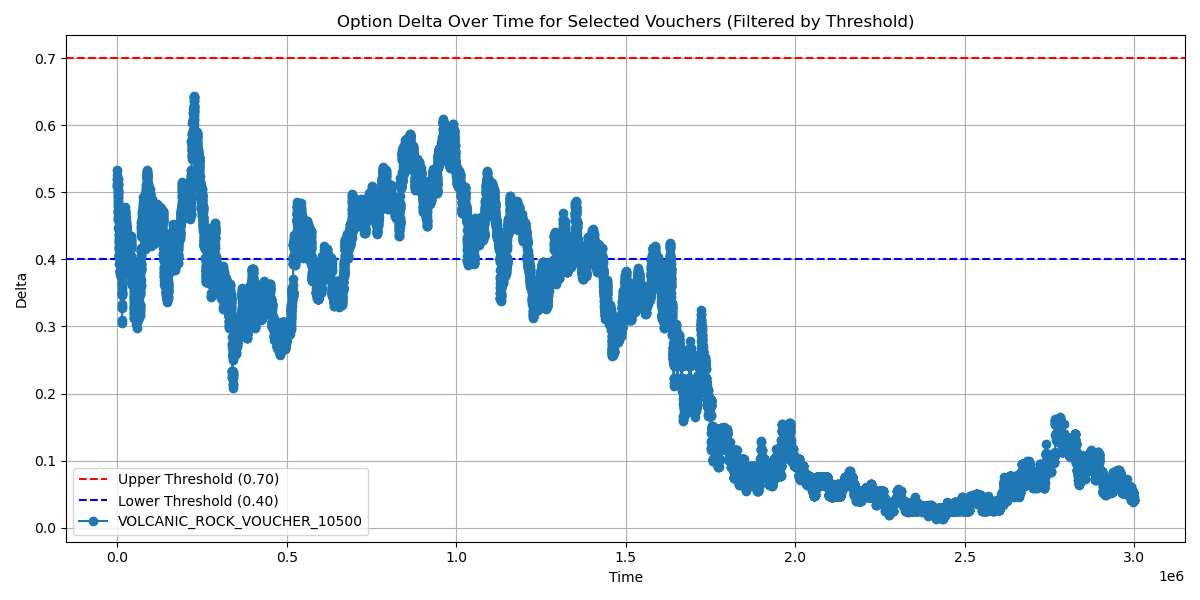

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10500']

# Define the delta thresholds.
thresholdup = 0.20  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [71]:
df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price'].diff()

time
0          NaN
100        7.0
200        3.0
300        4.5
400       -8.0
          ... 
2999500    1.5
2999600   -1.0
2999700    0.0
2999800    0.5
2999900   -1.0
Name: mid_price, Length: 30000, dtype: float64

In [73]:
df_all[df_all['product'] == 'VOLCANIC_VOUCHER_10000']['mid_price'].diff()


Series([], Name: mid_price, dtype: float64)

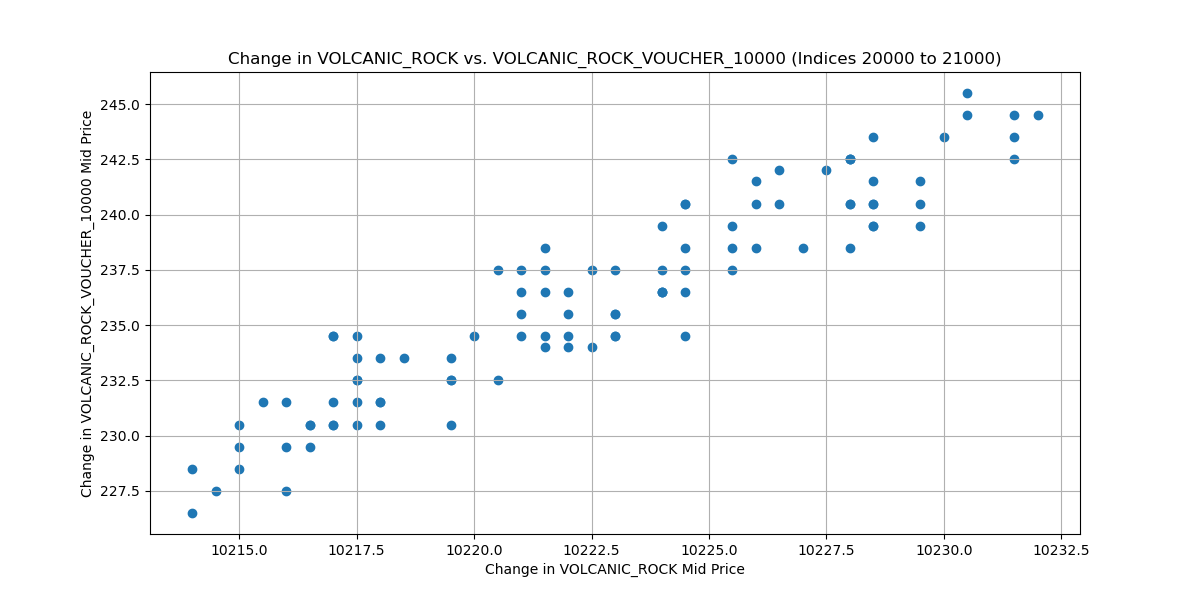

In [89]:
import matplotlib.pyplot as plt

# Compute differences in mid_price for each product.
rock_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']
voucher_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price']

# Subset the series to the desired rows.
rock_subset = rock_diff.iloc[20000:20100]
voucher_subset = voucher_diff.iloc[20000:20100]

# Create a scatter plot.
plt.figure(figsize=(12, 6))
plt.scatter(rock_subset, voucher_subset)
plt.title('Change in VOLCANIC_ROCK vs. VOLCANIC_ROCK_VOUCHER_10000 (Indices 20000 to 21000)')
plt.xlabel('Change in VOLCANIC_ROCK Mid Price')
plt.ylabel('Change in VOLCANIC_ROCK_VOUCHER_10000 Mid Price')
plt.grid(True)
plt.show()

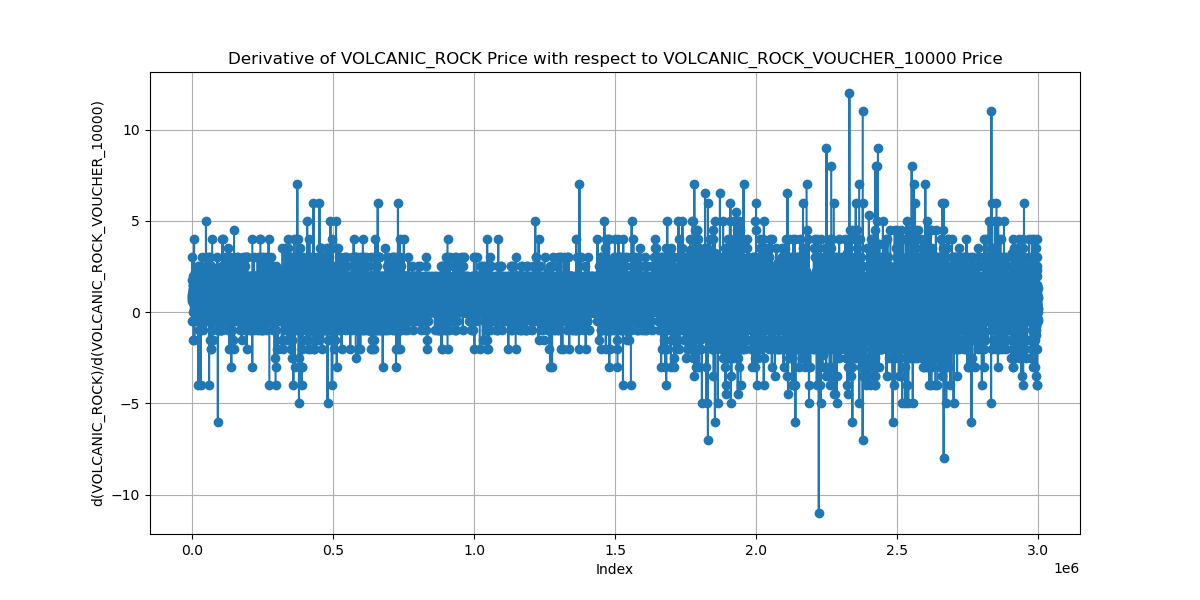

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Compute differences in mid_price for each product.
rock_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']
voucher_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price'].diff()

# Remove NaN values that result from diff().
rock_diff = rock_diff.dropna()
voucher_diff = voucher_diff.dropna()

# Make sure the indices align (this code assumes they do)
derivative = rock_diff / voucher_diff

# Alternatively, you could do a more robust computation avoiding division by zero:
# derivative = np.where(voucher_diff != 0, rock_diff / voucher_diff, np.nan)

# Create a plot.
plt.figure(figsize=(12, 6))
plt.plot(derivative, marker='o', linestyle='-')
plt.title('Derivative of VOLCANIC_ROCK Price with respect to VOLCANIC_ROCK_VOUCHER_10000 Price')
plt.xlabel('Index')
plt.ylabel('d(VOLCANIC_ROCK)/d(VOLCANIC_ROCK_VOUCHER_10000)')
plt.grid(True)
plt.show()

## Volatility curve

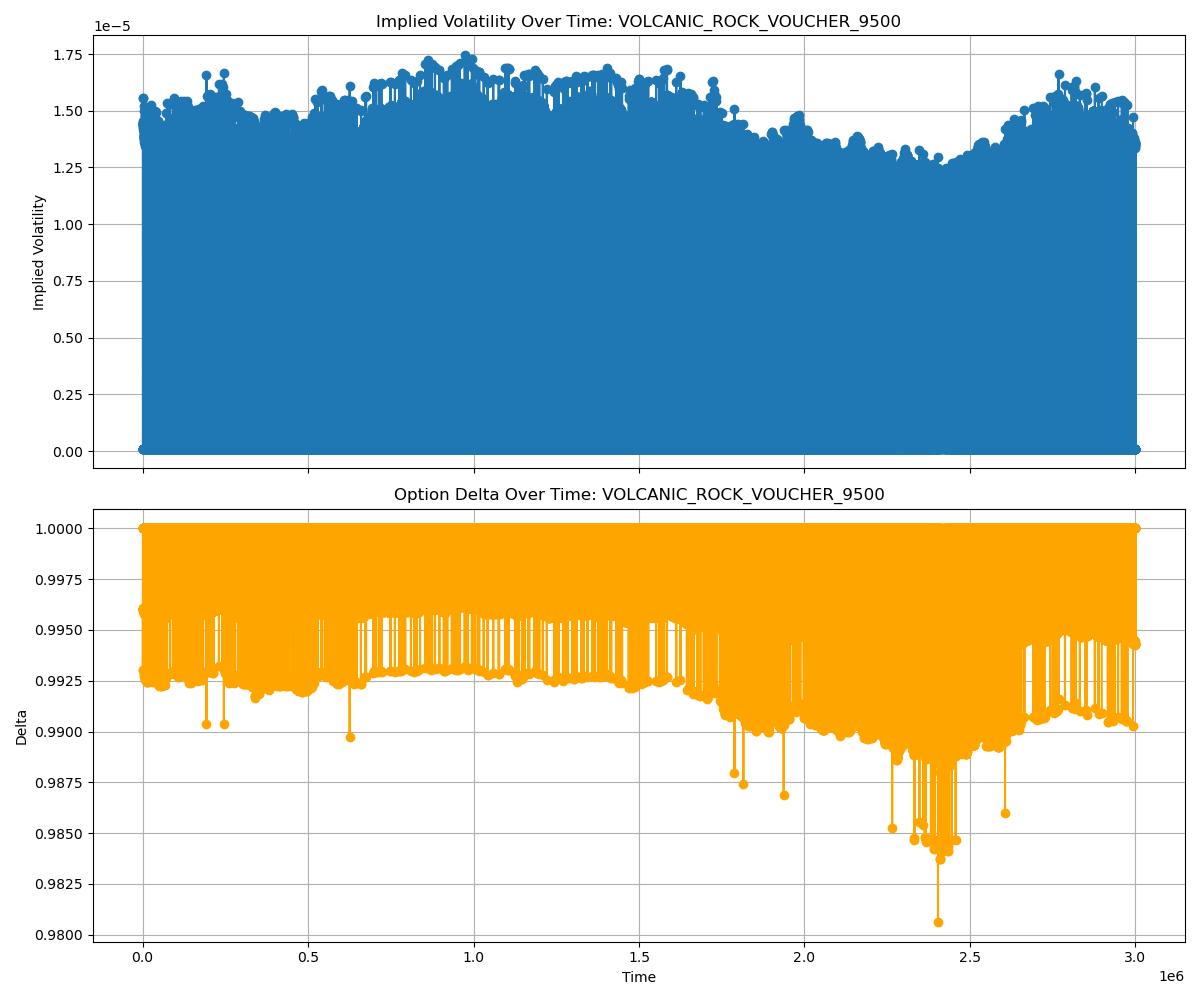

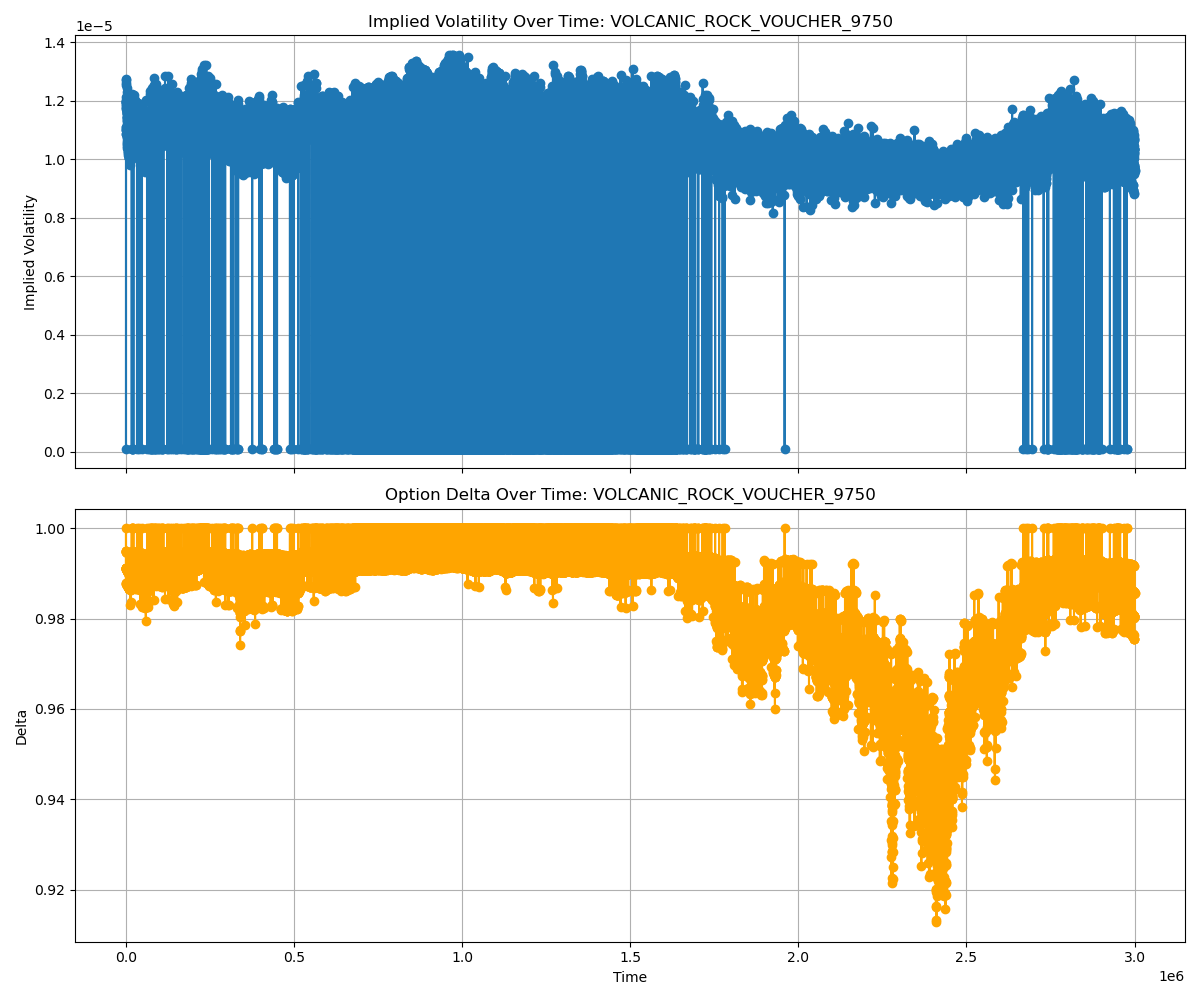

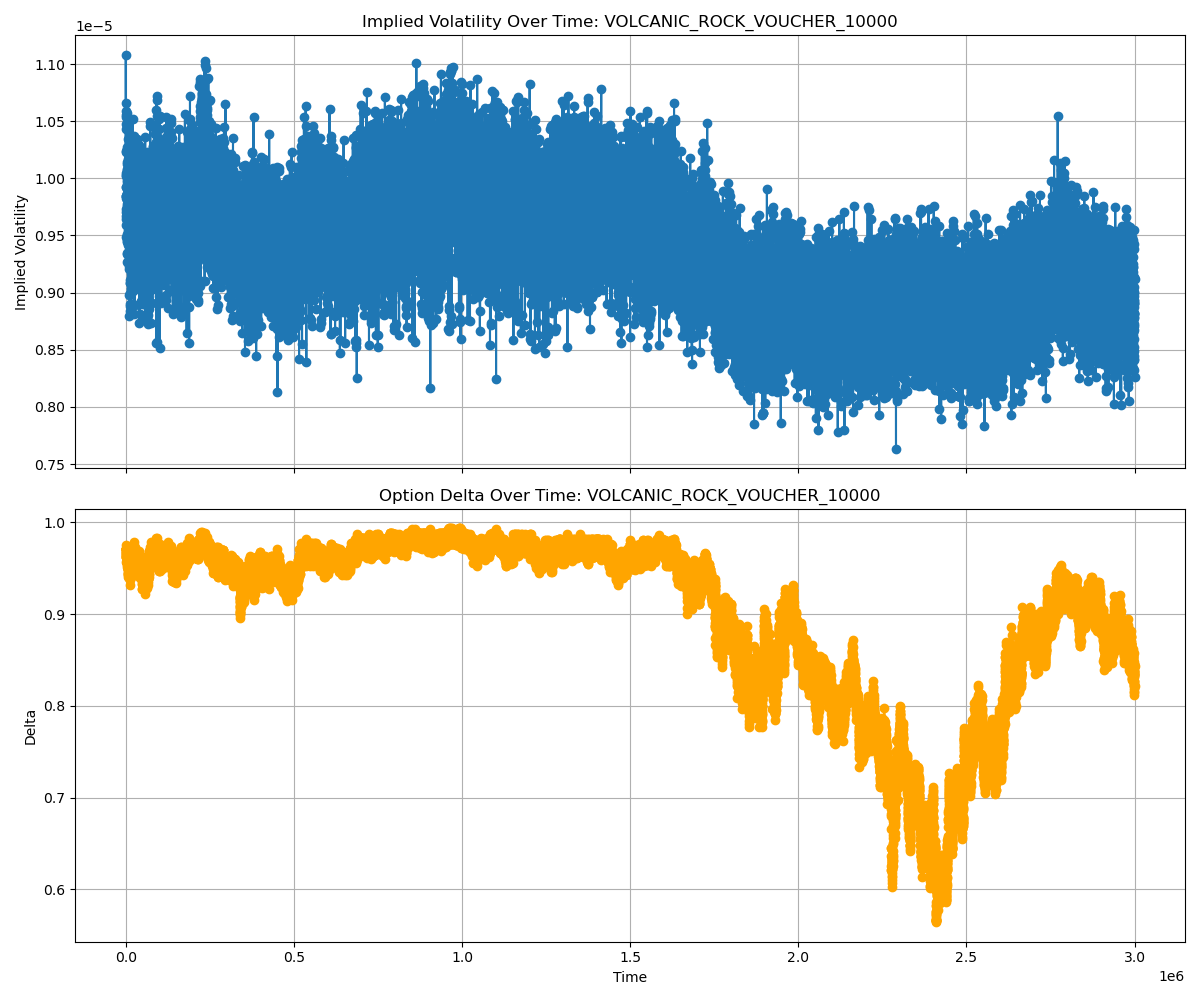

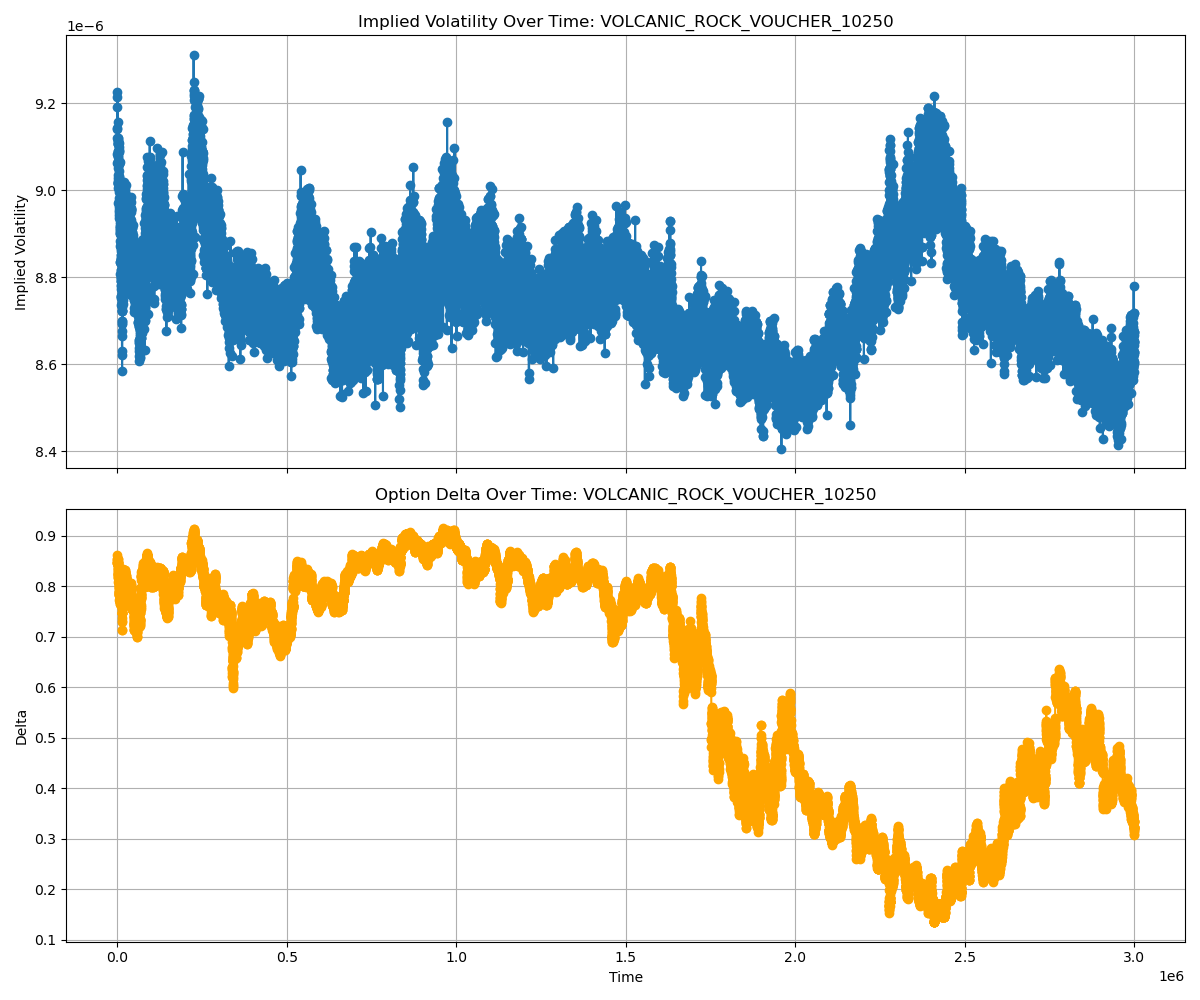

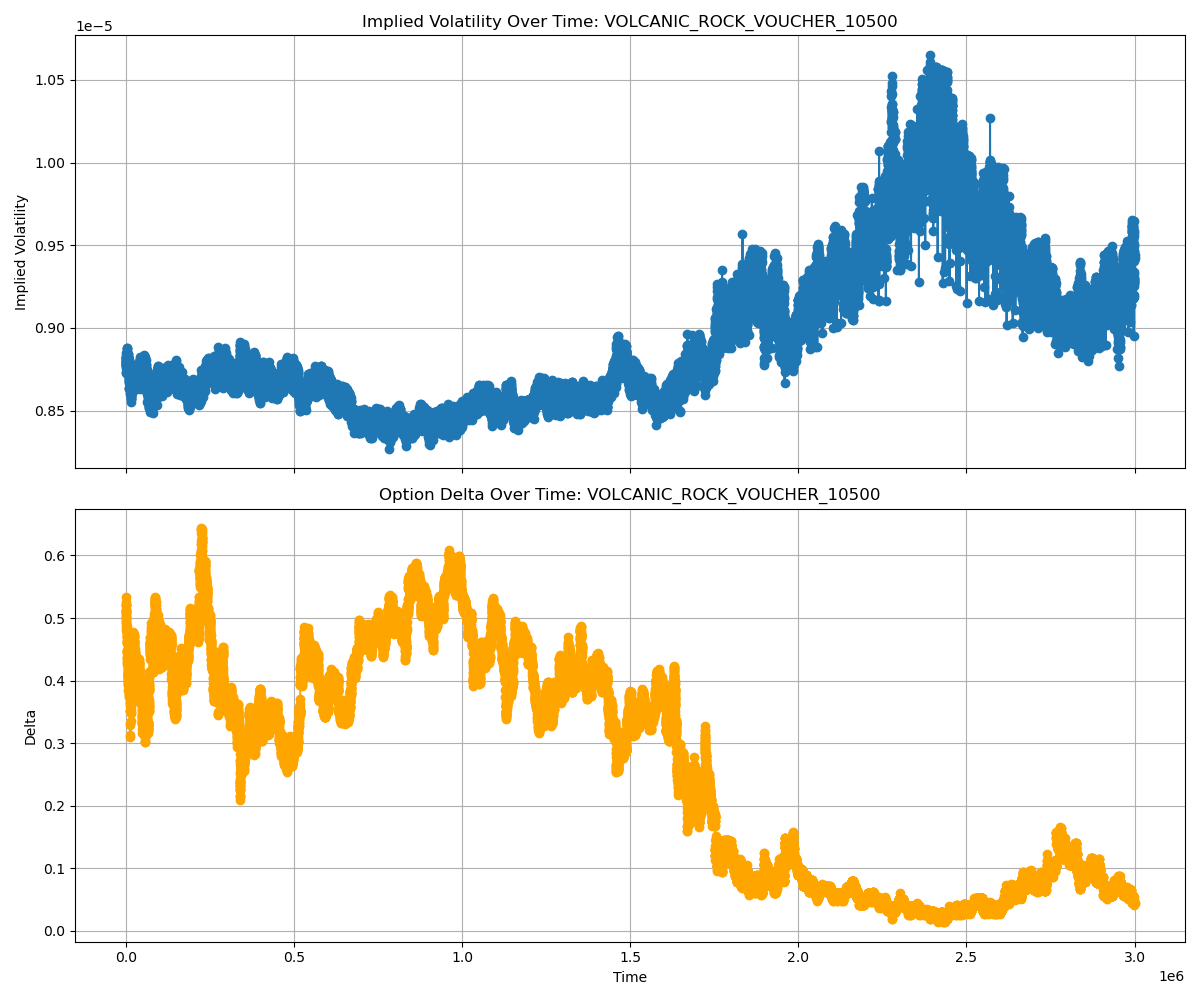

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
      S: underlying price
      K: strike price
      T: time to maturity (in years)
      r: risk-free interest rate (annualized)
      sigma: volatility (annualized)
    
    Returns:
      call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-7):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
      S: underlying price
      K: strike price
      T: time to maturity (in years)
      r: risk-free interest rate (annualized)
      market_price: observed market price of the option
      tol: tolerance for the numerical solver
    
    Returns:
      implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-7, 1e-4, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
      S: underlying price
      K: strike price
      T: time to maturity (in years)
      r: risk-free interest rate (annualized)
      sigma: volatility (annualized)
    
    Returns:
      option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500),
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750),
    ('VOLCANIC_ROCK_VOUCHER_10000', 10000),
    ('VOLCANIC_ROCK_VOUCHER_10250', 10250),
    ('VOLCANIC_ROCK_VOUCHER_10500', 10500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now (using your convention).
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine underlying and option mid prices into a single DataFrame.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option  # This is the observed mid_price for the option.
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    # Ensure that T is in years if Black-Scholes expects annualized volatility.
    # If your time unit is not in years, adjust the conversion accordingly.
    data['time_to_maturity'] = (maturity_date - data.index) 
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    # Loop through each observation to compute IV and delta.
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    
    # Save the mid_price as a separate column.
    data['mid_price'] = data['option']
    
    # --- Save the DataFrame to a CSV file ---
    output_filename = f"{product}_iv_delta_record.csv"
    data.to_csv(output_filename)
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/36823197.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/36823197.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/36823197.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thb

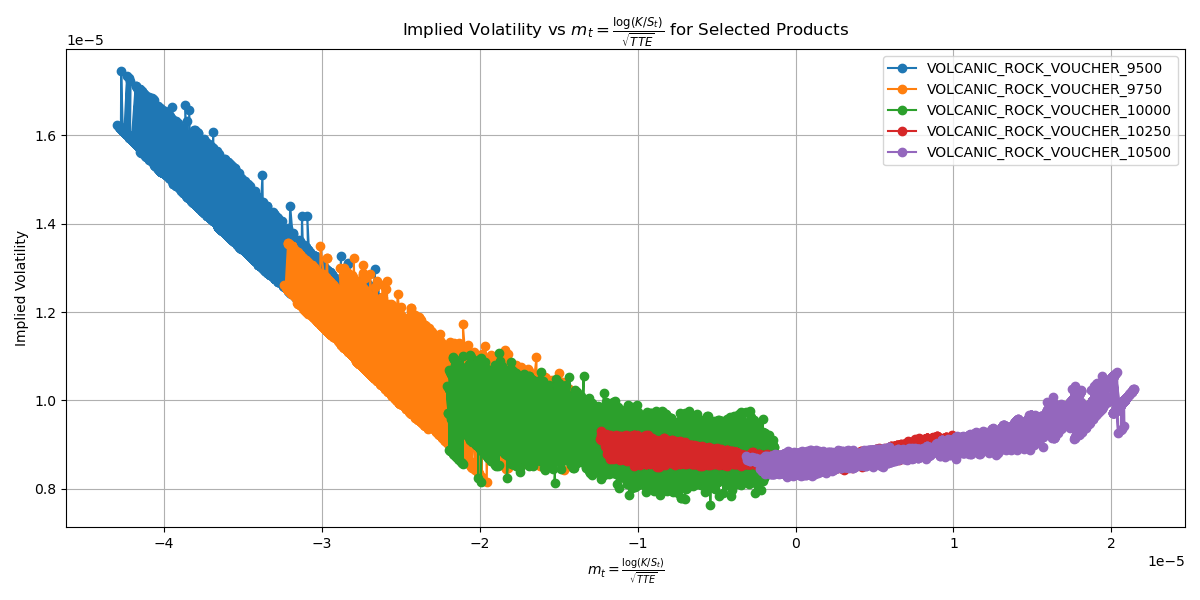

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',  # Comma added here
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

fig, ax = plt.subplots(figsize=(12, 6))

# Loop over selected products, load the CSV file, and plot the implied volatility curve.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Remove rows with NaN in key columns and where delta is zero or implied_vol equals 1e-07.
    data = data.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    data = data[(data['delta'] != 0) & (data['implied_vol'] != 1e-07)]
    
    # Extract the strike price from the product name.
    # The product name is assumed to follow the pattern: 'VOLCANIC_ROCK_VOUCHER_<strike>'
    strike = float(product.split('_')[-1])
    
    # Compute m_t using the formula: m_t = log(K/S_t) / sqrt(TTE)
    data["m_t"] = np.log(strike / data["underlying"]) / np.sqrt(data["time_to_maturity"])
    
    # Plot implied volatility versus m_t.
    ax.plot(data["m_t"], data["implied_vol"], marker='o', linestyle='-', label=product)

ax.set_title('Implied Volatility vs $m_t = \\frac{\\log(K/S_t)}{\\sqrt{TTE}}$ for Selected Products')
ax.set_xlabel('$m_t = \\frac{\\log(K/S_t)}{\\sqrt{TTE}}$')
ax.set_ylabel('Implied Volatility')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [206]:
data

underlying  option  time_to_maturity  implied_vol     delta  \
time                                                                   
0           10503.0    99.5           7000000     0.000009  0.509538   
100         10510.0   102.5           6999900     0.000009  0.520949   
200         10513.0   104.5           6999800     0.000009  0.525740   
300         10517.5   106.5           6999700     0.000009  0.533176   
400         10509.5   102.5           6999600     0.000009  0.520108   
...             ...     ...               ...          ...       ...   
2999500     10168.0     3.5           4000500     0.000009  0.044759   
2999600     10167.0     3.5           4000400     0.000009  0.044655   
2999700     10167.0     3.5           4000300     0.000009  0.044655   
2999800     10167.5     3.5           4000200     0.000009  0.044707   
2999900     10166.5     3.5           4000100     0.000009  0.044602   

         mid_price       m_t  
time                          
0             99.5  0.001761  
100          102.5  0.001750  
200          104.5  0.001742  
300          106.5  0.001735  
400          102.5  0.001750  
...            ...       ...  
2999500        3.5  0.004003  
2999600        3.5  0.004003  
2999700        3.5  0.004003  
2999800        3.5  0.004003  
2999900        3.5  0.004003  

[30000 rows x 7 columns]

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, SelectionSlider

# --- 1. Data Loading and Preprocessing ---

# List of products (vouchers).
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Load and filter data for each voucher.
# Rows with NaN in key columns or where delta==0 or implied_vol==1e-07 are dropped.
product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index (time) to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# Determine common timestamps present in every voucher.
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# Optionally, skip some timestamps to reduce clutter.
skip_factor = 2  # For example, take every 2nd timestamp.
common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to only the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 2. Global Parabolic Fit at Each Timestamp ---
# At each common timestamp, we aggregate one representative (m_t, iv) pair for each voucher.
# For a given voucher, m_t is computed as:
#   m_t = log(K/mid_price) / sqrt(time_to_maturity)
# We then fit a quadratic to the aggregated five points and compute its vertex.
global_fit = {}           # Key: timestamp, value: dict with aggregated 'x', 'y', 'coeffs', 'poly', and 'vertex'
global_vertex_evolution = []  # Vertex value at each common timestamp

for ts in common_times:
    X_list = []
    Y_list = []
    for product in selected_products:
        # Here we use the strike from the product name.
        strike = float(product.split('_')[-1])
        df_ts = product_data[product].loc[product_data[product].index == ts]
        if df_ts.empty:
            continue
        # Compute m_t values for each row and take the mean as the representative value.
        m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
        m_t_rep = m_t_vals.mean()
        iv_rep = df_ts["implied_vol"].mean()
        X_list.append(m_t_rep)
        Y_list.append(iv_rep)
    
    X_arr = np.array(X_list)
    Y_arr = np.array(Y_list)
    
    if len(X_arr) < 3:
        global_fit[ts] = None
        global_vertex_evolution.append(np.nan)
    else:
        coeffs = np.polyfit(X_arr, Y_arr, 2)  # Fit quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        if coeffs[0] == 0:
            vertex = np.nan
        else:
            vertex = -coeffs[1] / (2 * coeffs[0])
        global_fit[ts] = {
            'x': X_arr,
            'y': Y_arr,
            'coeffs': coeffs,
            'poly': poly,
            'vertex': vertex,
            'x_min': X_arr.min(),
            'x_max': X_arr.max()
        }
        global_vertex_evolution.append(vertex)

# --- 3. Interactive Plotting ---

def update_plot(time_value):
    fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Top Subplot: Plot aggregated data and fitted parabola for the selected timestamp.
    data = global_fit.get(time_value, None)
    if data is None:
        ax_top.text(0.5, 0.5, "Not enough data to fit a parabola at this time", 
                    transform=ax_top.transAxes, ha='center', va='center', fontsize=14, color='red')
    else:
        X_arr, Y_arr = data['x'], data['y']
        coeffs = data['coeffs']
        poly = data['poly']
        vertex = data['vertex']
        
        # Plot raw aggregated data points.
        ax_top.plot(X_arr, Y_arr, 'o', label='Aggregated Data')
        
        # Create a smooth curve over an extended range.
        x_fit = np.linspace(data['x_min'] * 0.95, data['x_max'] * 1.05, 100)
        y_fit = poly(x_fit)
        ax_top.plot(x_fit, y_fit, '-', label='Parabolic Fit')
        
        # Mark the vertex if valid.
        if not np.isnan(vertex):
            ax_top.plot(vertex, poly(vertex), 'ks', markersize=10, label='Vertex')
        
        # Set the title with just a, b, and c.
        a, b, c = coeffs
        ax_top.set_title(f'a = {a:.5f}, b = {b:.5f}, c = {c:.5f}')
        
        ax_top.set_xlabel('$m_t=\\frac{\\log(K/S_t)}{\\sqrt{TTE}}$')
        ax_top.set_ylabel('Implied Volatility')
        ax_top.legend()
        ax_top.grid(True)
    
    # Bottom Subplot: Plot evolution of the vertex over time.
    ax_bottom.plot(common_times, global_vertex_evolution, marker='o', linestyle='-', label='Vertex Evolution')
    try:
        idx = common_times.index(time_value)
        current_vertex = global_vertex_evolution[idx]
        if not np.isnan(current_vertex):
            ax_bottom.plot(time_value, current_vertex, 'ks', markersize=12, label='Selected Vertex')
    except ValueError:
        pass
    ax_bottom.set_title('Evolution of Global Parabola Vertex over Time')
    ax_bottom.set_xlabel('Time')
    ax_bottom.set_ylabel('Vertex ($m_t$)')
    ax_bottom.legend()
    ax_bottom.grid(True)
    
    plt.tight_layout()
    plt.show()

# Use a SelectionSlider for time with only the valid common timestamps.
time_slider = SelectionSlider(options=common_times,
                              value=common_times[0],
                              description='Time',
                              continuous_update=False)

interact(update_plot, time_value=time_slider)

interactive(children=(SelectionSlider(continuous_update=False, description='Time', options=(0, 200, 400, 600, …

<function __main__.update_plot(time_value)>

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, SelectionSlider

# --- 1. Data Loading and Preprocessing ---

# List of products (vouchers).
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Load and filter data for each voucher.
# Rows with NaN in key columns or where delta==0 or implied_vol==1e-07 are dropped.
product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index (time) to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# Determine common timestamps present in every voucher.
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, SelectionSlider

# --- 1. Data Loading and Preprocessing ---

# List of products (vouchers).
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Load and filter data for each voucher.
# Rows with NaN in key columns or where delta==0 or implied_vol==1e-07 are dropped.
product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index (time) to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# Determine common timestamps present in every voucher.
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# Optionally, skip some timestamps to reduce clutter.
skip_factor = 2  # For example, take every 2nd timestamp.
common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to only the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 2. Global Parabolic Fit at Each Timestamp ---
# At each common timestamp, we aggregate one representative (m_t, iv) pair for each voucher.
# For a given voucher, m_t is computed as:
#   m_t = log(K/mid_price) / sqrt(time_to_maturity)
# We then fit a quadratic to the aggregated five points and compute its vertex.
global_fit = {}           # Key: timestamp, value: dict with aggregated 'x', 'y', 'coeffs', 'poly', and 'vertex'
global_vertex_evolution = []  # Vertex value at each common timestamp

for ts in common_times:
    X_list = []
    Y_list = []
    for product in selected_products:
        # Here we use the strike from the product name.
        strike = float(product.split('_')[-1])
        df_ts = product_data[product].loc[product_data[product].index == ts]
        if df_ts.empty:
            continue
        # Compute m_t values for each row and take the mean as the representative value.
        m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
        m_t_rep = m_t_vals.mean()
        iv_rep = df_ts["implied_vol"].mean()
        X_list.append(m_t_rep)
        Y_list.append(iv_rep)
    
    X_arr = np.array(X_list)
    Y_arr = np.array(Y_list)
    
    if len(X_arr) < 3:
        global_fit[ts] = None
        global_vertex_evolution.append(np.nan)
    else:
        coeffs = np.polyfit(X_arr, Y_arr, 2)  # Fit quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        if coeffs[0] == 0:
            vertex = np.nan
        else:
            vertex = -coeffs[1] / (2 * coeffs[0])
        global_fit[ts] = {
            'x': X_arr,
            'y': Y_arr,
            'coeffs': coeffs,
            'poly': poly,
            'vertex': vertex,
            'x_min': X_arr.min(),
            'x_max': X_arr.max()
        }
        global_vertex_evolution.append(vertex)

# --- 3. Interactive Plotting ---

def update_plot(time_value):
    fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Top Subplot: Plot aggregated data and fitted parabola for the selected timestamp.
    data = global_fit.get(time_value, None)
    if data is None:
        ax_top.text(0.5, 0.5, "Not enough data to fit a parabola at this time", 
                    transform=ax_top.transAxes, ha='center', va='center', fontsize=14, color='red')
    else:
        X_arr, Y_arr = data['x'], data['y']
        coeffs = data['coeffs']
        poly = data['poly']
        vertex = data['vertex']
        
        # Plot raw aggregated data points.
        ax_top.plot(X_arr, Y_arr, 'o', label='Aggregated Data')
        
        # Create a smooth curve over an extended range.
        x_fit = np.linspace(data['x_min'] * 0.95, data['x_max'] * 1.05, 100)
        y_fit = poly(x_fit)
        ax_top.plot(x_fit, y_fit, '-', label='Parabolic Fit')
        
        # Mark the vertex.
        if not np.isnan(vertex):
            ax_top.plot(vertex, poly(vertex), 'ks', markersize=10, label='Vertex')
        
        ax_top.set_title(f'Global Parabolic Fit at time {time_value:.0f}')
        ax_top.set_xlabel('$m_t=\\frac{\\log(K/S_t)}{\\sqrt{TTE}}$')
        ax_top.set_ylabel('Implied Volatility')
        ax_top.legend()
        ax_top.grid(True)
    
    # Bottom Subplot: Plot evolution of the vertex over time.
    ax_bottom.plot(common_times, global_vertex_evolution, marker='o', linestyle='-', label='Vertex Evolution')
    try:
        idx = common_times.index(time_value)
        current_vertex = global_vertex_evolution[idx]
        if not np.isnan(current_vertex):
            ax_bottom.plot(time_value, current_vertex, 'ks', markersize=12, label='Selected Vertex')
    except ValueError:
        pass
    ax_bottom.set_title('Evolution of Global Parabola Vertex over Time')
    ax_bottom.set_xlabel('Time')
    ax_bottom.set_ylabel('Vertex ($m_t$)')
    ax_bottom.legend()
    ax_bottom.grid(True)
    
    plt.tight_layout()
    plt.show()

# Use a SelectionSlider for time with only the valid common timestamps.
time_slider = SelectionSlider(options=common_times,
                              value=common_times[0],
                              description='Time',
                              continuous_update=False)

interact(update_plot, time_value=time_slider)
# Optionally, skip some timestamps to reduce clutter.
skip_factor = 2  # For example, take every 2nd timestamp.
common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to only the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 2. Global Parabolic Fit at Each Timestamp ---
# At each common timestamp, we aggregate one representative (m_t, iv) pair for each voucher.
# For a given voucher, m_t is computed as:
#   m_t = log(K/underlying) / sqrt(time_to_maturity)
# We then fit a quadratic to the aggregated five points and compute its vertex.
global_fit = {}                # Key: timestamp, value: dict with aggregated data and fit results.
global_vertex_evolution = []     # Vertex value at each common timestamp.
global_coeff_a_evolution = []    # a coefficient evolution.
global_coeff_b_evolution = []    # b coefficient evolution.
global_coeff_c_evolution = []    # c coefficient evolution.

for ts in common_times:
    X_list = []
    Y_list = []
    for product in selected_products:
        # Extract the strike from the product name.
        strike = float(product.split('_')[-1])
        df_ts = product_data[product].loc[product_data[product].index == ts]
        if df_ts.empty:
            continue
        # Compute m_t values for each row and take the mean as the representative value.
        m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
        m_t_rep = m_t_vals.mean()
        iv_rep = df_ts["implied_vol"].mean()
        X_list.append(m_t_rep)
        Y_list.append(iv_rep)
    
    X_arr = np.array(X_list)
    Y_arr = np.array(Y_list)
    
    if len(X_arr) < 3:
        global_fit[ts] = None
        global_vertex_evolution.append(np.nan)
        global_coeff_a_evolution.append(np.nan)
        global_coeff_b_evolution.append(np.nan)
        global_coeff_c_evolution.append(np.nan)
    else:
        coeffs = np.polyfit(X_arr, Y_arr, 2)  # Fit quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        if coeffs[0] == 0:
            vertex = np.nan
        else:
            vertex = -coeffs[1] / (2 * coeffs[0])
        global_fit[ts] = {
            'x': X_arr,
            'y': Y_arr,
            'coeffs': coeffs,
            'poly': poly,
            'vertex': vertex,
            'x_min': X_arr.min(),
            'x_max': X_arr.max()
        }
        global_vertex_evolution.append(vertex)
        global_coeff_a_evolution.append(coeffs[0])
        global_coeff_b_evolution.append(coeffs[1])
        global_coeff_c_evolution.append(coeffs[2])

# --- 3. Interactive Plotting ---
def update_plot(time_value):
    fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Top Subplot: Plot aggregated data and fitted parabola for the selected timestamp.
    data = global_fit.get(time_value, None)
    if data is None:
        ax_top.text(0.5, 0.5, "Not enough data to fit a parabola at this time", 
                    transform=ax_top.transAxes, ha='center', va='center', fontsize=14, color='red')
    else:
        X_arr, Y_arr = data['x'], data['y']
        coeffs = data['coeffs']
        poly = data['poly']
        vertex = data['vertex']
        
        # Plot raw aggregated data points.
        ax_top.plot(X_arr, Y_arr, 'o', label='Aggregated Data')
        
        # Create a smooth curve over an extended range.
        x_fit = np.linspace(data['x_min'] * 0.95, data['x_max'] * 1.05, 100)
        y_fit = poly(x_fit)
        ax_top.plot(x_fit, y_fit, '-', label='Parabolic Fit')
        
        # Mark the vertex if valid.
        if not np.isnan(vertex):
            ax_top.plot(vertex, poly(vertex), 'ks', markersize=10, label='Vertex')
        
        # Include a, b, and c in the title.
        a, b, c = coeffs
        ax_top.set_title(f'Global Parabolic Fit at time {time_value:.0f}\n'
                         f'a = {a:.5f}, b = {b:.5f}, c = {c:.5f}')
        
        ax_top.set_xlabel('$m_t=\\frac{\\log(K/S)}{\\sqrt{TTE}}$')
        ax_top.set_ylabel('Implied Volatility')
        ax_top.legend()
        ax_top.grid(True)
    
    # Bottom Subplot: Plot evolution of the vertex over time.
    ax_bottom.plot(common_times, global_vertex_evolution, marker='o', linestyle='-', label='Vertex Evolution')
    try:
        idx = common_times.index(time_value)
        current_vertex = global_vertex_evolution[idx]
        if not np.isnan(current_vertex):
            ax_bottom.plot(time_value, current_vertex, 'ks', markersize=12, label='Selected Vertex')
    except ValueError:
        pass
    ax_bottom.set_title('Evolution of Global Parabola Vertex over Time')
    ax_bottom.set_xlabel('Time')
    ax_bottom.set_ylabel('Vertex ($m_t$)')
    ax_bottom.legend()
    ax_bottom.grid(True)
    
    plt.tight_layout()
    plt.show()

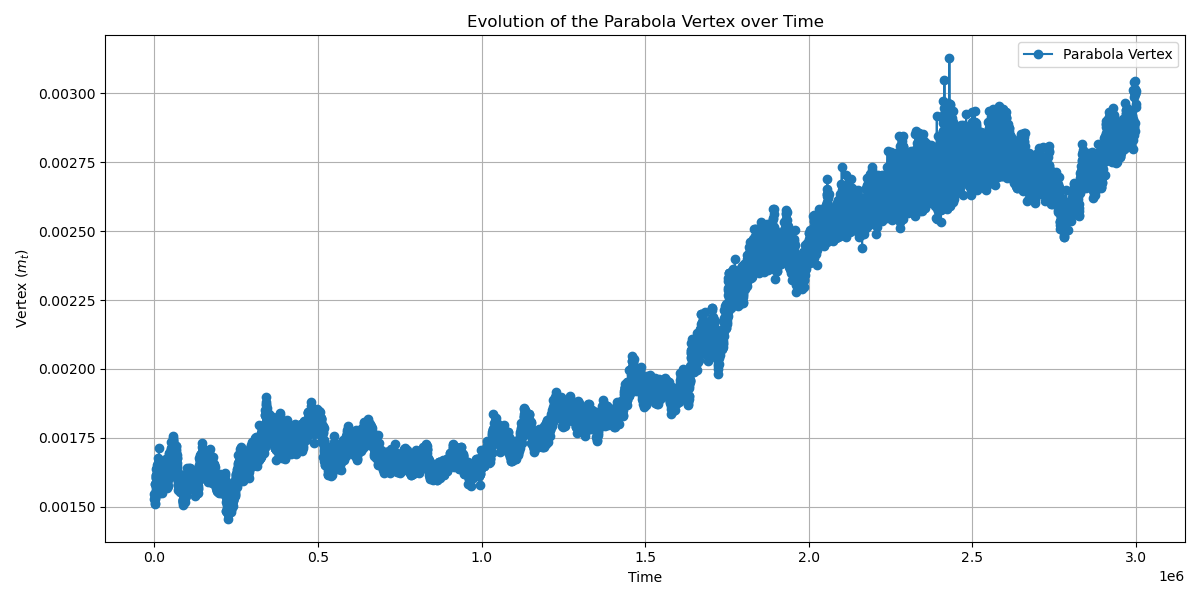

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Loading and Preprocessing ---
# List of products (vouchers)
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the strike (K) for each voucher in a dictionary.
K_dict = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500
}

# Load each voucher's data from CSV, drop rows with missing key data or unwanted values.
product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index (assumed to be time) to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# --- 2. Determine Common Timestamps ---
# Find timestamps that exist in every voucher.
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# Optionally, skip timestamps (e.g., take every 2nd timestamp) to reduce clutter.
skip_factor = 2
common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to only include rows at the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 3. Fit a Parabola at Each Timestamp ---
# For each common timestamp, aggregate one representative point from each of the five vouchers.
# We compute m_t = log(K/mid_price)/sqrt(time_to_maturity) and average the implied volatilities.
# Then we fit a quadratic (degree 2) to these five points and extract the vertex.
vertex_evolution = []  # List to store the vertex for each timestamp.
fitted_data = {}       # Dictionary to store the fitting details per timestamp.

for ts in common_times:
    # Lists to store the aggregated (m_t, iv) values.
    m_values = []
    iv_values = []
    for product in selected_products:
        strike = K_dict[product]
        df_ts = product_data[product].loc[product_data[product].index == ts]
        if df_ts.empty:
            continue
        # Compute m_t for each row and use the mean as representative.
        m_t_vals = np.log(strike / df_ts["mid_price"]) / np.sqrt(df_ts["time_to_maturity"])
        m_t_rep = m_t_vals.mean()
        iv_rep = df_ts["implied_vol"].mean()
        m_values.append(m_t_rep)
        iv_values.append(iv_rep)
    
    m_values = np.array(m_values)
    iv_values = np.array(iv_values)
    
    # We need at least three points to fit a quadratic (we expect 5).
    if len(m_values) < 3:
        vertex_evolution.append(np.nan)
        fitted_data[ts] = None
    else:
        coeffs = np.polyfit(m_values, iv_values, 2)  # Fit a quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        if coeffs[0] == 0:
            vertex = np.nan
        else:
            vertex = -coeffs[1] / (2 * coeffs[0])
        vertex_evolution.append(vertex)
        fitted_data[ts] = {
            'coeffs': coeffs,
            'vertex': vertex,
            'm_values': m_values,
            'iv_values': iv_values,
            'poly': poly
        }

# --- 4. Plot the Vertex Evolution over Time ---

plt.figure(figsize=(12, 6))
plt.plot(common_times, vertex_evolution, marker='o', linestyle='-', label='Parabola Vertex')
plt.title('Evolution of the Parabola Vertex over Time')
plt.xlabel('Time')
plt.ylabel('Vertex ($m_t$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

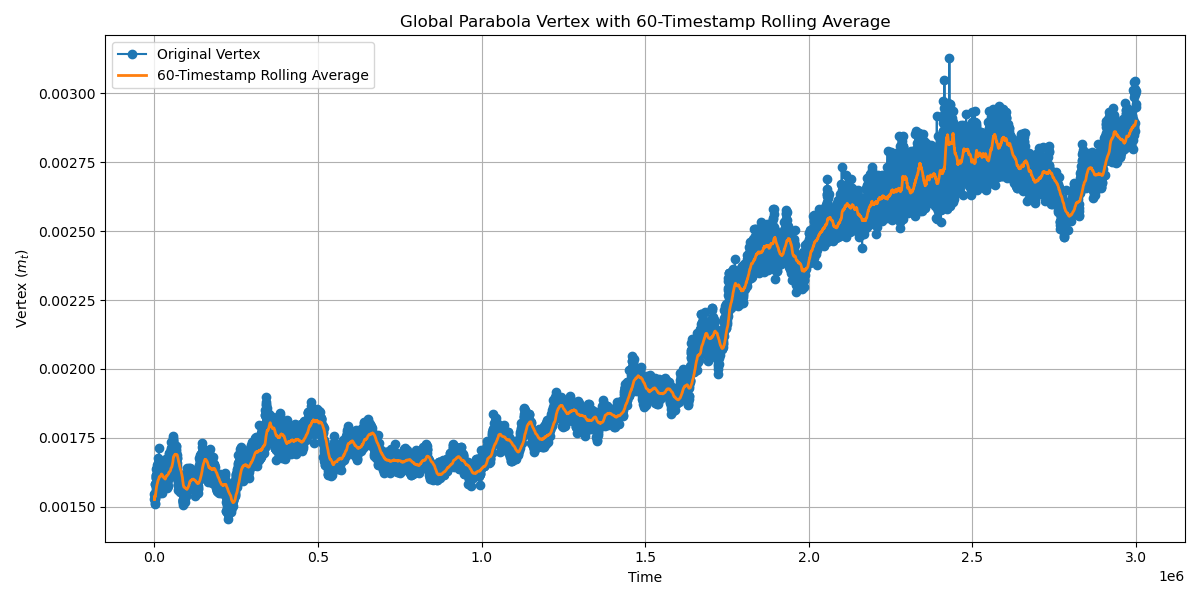

In [188]:
vertex_series = pd.Series(vertex_evolution, index=common_times)
# Compute the rolling average with a window of 60 timestamps.
vertex_rolling = vertex_series.rolling(window=60, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(vertex_series.index, vertex_series.values, marker='o', linestyle='-', label='Original Vertex')
plt.plot(vertex_rolling.index, vertex_rolling.values, marker='', linestyle='-', linewidth=2, label='60-Timestamp Rolling Average')
plt.title('Global Parabola Vertex with 60-Timestamp Rolling Average')
plt.xlabel('Time')
plt.ylabel('Vertex ($m_t$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Implied volatility BASE IV as a function of time

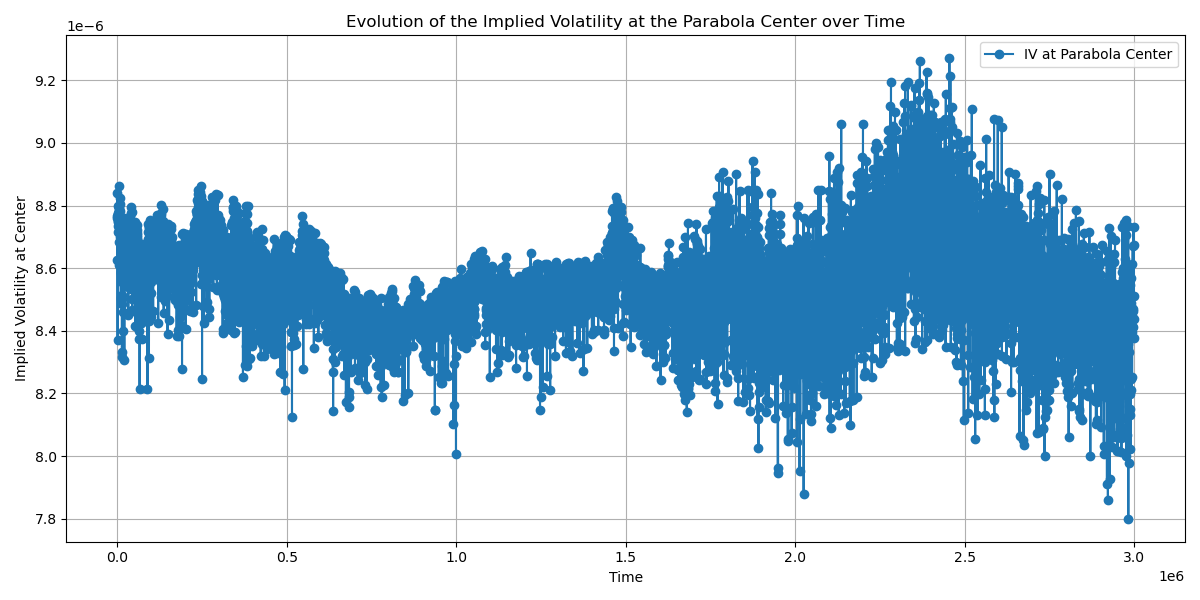

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Loading and Preprocessing ---
# List of products (vouchers)
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the strike (K) for each voucher in a dictionary.
K_dict = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500
}

# Load each voucher's data from CSV, drop rows with missing key data or unwanted values.
product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index (assumed to be time) to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# --- 2. Determine Common Timestamps ---
# Find timestamps that exist in every voucher.
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# Optionally, skip timestamps (e.g., take every 2nd timestamp) to reduce clutter.
skip_factor = 2
common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to only include rows at the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 3. Fit a Parabola at Each Timestamp ---
# For each common timestamp, aggregate one representative point from each of the five vouchers.
# Compute m_t = log(K/mid_price)/sqrt(time_to_maturity) and average the implied volatilities.
# Then fit a quadratic (degree 2) to these five points and extract the vertex.
# Now we compute not only the vertex (m_t value) but also the implied volatility at that vertex.
vertex_iv_evolution = []  # List to store the implied volatility (at the vertex) for each timestamp.
fitted_data = {}          # Dictionary to store the fitting details per timestamp.

for ts in common_times:
    # Lists to store the aggregated (m_t, iv) values.
    m_values = []
    iv_values = []
    for product in selected_products:
        strike = K_dict[product]
        df_ts = product_data[product].loc[product_data[product].index == ts]
        if df_ts.empty:
            continue
        # Compute m_t for each row and use the mean as representative.
        m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
        m_t_rep = m_t_vals.mean()
        iv_rep = df_ts["implied_vol"].mean()
        m_values.append(m_t_rep)
        iv_values.append(iv_rep)
    
    m_values = np.array(m_values)
    iv_values = np.array(iv_values)
    
    # Require at least three points (we expect 5) to fit a quadratic.
    if len(m_values) < 3:
        vertex_iv_evolution.append(np.nan)
        fitted_data[ts] = None
    else:
        coeffs = np.polyfit(m_values, iv_values, 2)  # Fit quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        if coeffs[0] == 0:
            vertex_m = np.nan
            vertex_iv = np.nan
        else:
            vertex_m = -coeffs[1] / (2 * coeffs[0])
            vertex_iv = poly(vertex_m)
        vertex_iv_evolution.append(vertex_iv)
        fitted_data[ts] = {
            'coeffs': coeffs,
            'vertex_m': vertex_m,
            'vertex_iv': vertex_iv,
            'm_values': m_values,
            'iv_values': iv_values,
            'poly': poly
        }

# --- 4. Plot the Implied Volatility at the Center of the Parabola over Time ---
plt.figure(figsize=(12, 6))
plt.plot(common_times, vertex_iv_evolution, marker='o', linestyle='-', label='IV at Parabola Center')
plt.title('Evolution of the Implied Volatility at the Parabola Center over Time')
plt.xlabel('Time')
plt.ylabel('Implied Volatility at Center')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

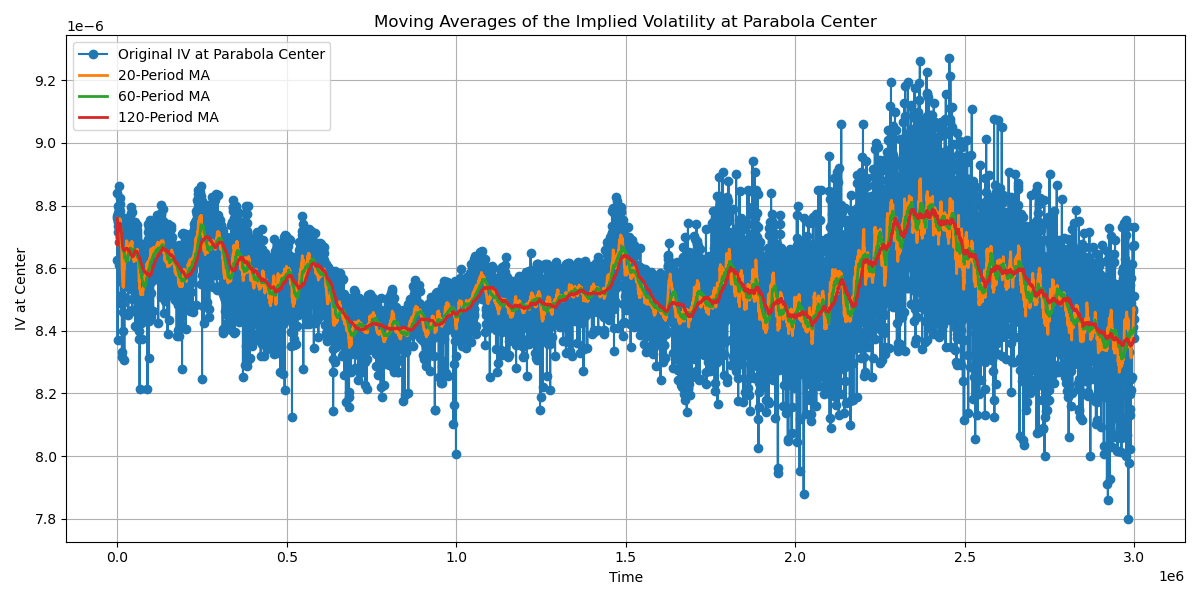

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the common_times and vertex_iv_evolution arrays into a pandas Series.
# This assumes that common_times is a list (or array) of timestamps and vertex_iv_evolution contains the IV at each timestamp.
vertex_series = pd.Series(vertex_iv_evolution, index=common_times)

# Compute moving averages with different window sizes.
# For example, a 20-timestamp MA, a 60-timestamp MA, and a 120-timestamp MA.
ma20 = vertex_series.rolling(window=20, min_periods=1).mean()
ma60 = vertex_series.rolling(window=60, min_periods=1).mean()
ma120 = vertex_series.rolling(window=120, min_periods=1).mean()

plt.figure(figsize=(12, 6))
plt.plot(vertex_series.index, vertex_series.values, marker='o', linestyle='-', 
         label='Original IV at Parabola Center')
plt.plot(ma20.index, ma20.values, linestyle='-', linewidth=2, label='20-Period MA')
plt.plot(ma60.index, ma60.values, linestyle='-', linewidth=2, label='60-Period MA')
plt.plot(ma120.index, ma120.values, linestyle='-', linewidth=2, label='120-Period MA')
plt.title('Moving Averages of the Implied Volatility at Parabola Center')
plt.xlabel('Time')
plt.ylabel('IV at Center')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [194]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, SelectionSlider

def update_binned_plot(time_value):
    fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Top Subplot: Plot aggregated (mean) points and fitted parabola for the selected binned timestamp.
    data = global_fit_binned.get(time_value, None)
    if data is None:
        ax_top.text(0.5, 0.5, "Not enough data to fit a parabola at this time", 
                    transform=ax_top.transAxes, ha='center', va='center', fontsize=14, color='red')
    else:
        X_arr, Y_arr = data['x'], data['y']
        poly = data['poly']
        vertex = data['vertex']
        
        # Plot the aggregated (representative) data points.
        ax_top.plot(X_arr, Y_arr, 'o', label='Aggregated Data')
        
        # Plot the quadratic (parabolic) fit.
        x_fit = np.linspace(data['x_min'] * 0.95, data['x_max'] * 1.05, 100)
        y_fit = poly(x_fit)
        ax_top.plot(x_fit, y_fit, '-', label='Parabolic Fit')
        
        # Mark the vertex.
        if not np.isnan(vertex):
            ax_top.plot(vertex, poly(vertex), 'ks', markersize=10, label='Vertex')
    
    # Additionally, plot all individual raw data points that went into the bin for each voucher.
    # (These are the points used to compute the representative mean for each product.)
    label_set = set()
    for product in selected_products:
         strike = float(product.split('_')[-1])
         df_ts = product_data[product].loc[product_data[product].index == time_value]
         if not df_ts.empty:
             # Compute all individual m_t values and implied vols.
             m_t_vals = np.log(strike / df_ts["mid_price"]) / np.sqrt(df_ts["time_to_maturity"])
             iv_vals = df_ts["implied_vol"]
             # Avoid duplicate labels in the legend.
             label = product if product not in label_set else None
             if label is not None:
                 label_set.add(product)
             ax_top.scatter(m_t_vals, iv_vals, s=60, alpha=0.7, edgecolor='black', label=label)
    
    ax_top.set_title(f'Binned Global Parabolic Fit at time {time_value:.0f}')
    ax_top.set_xlabel('$m_t=\\frac{\\log(K/S_t)}{\\sqrt{TTE}}$')
    ax_top.set_ylabel('Implied Volatility')
    ax_top.legend()
    ax_top.grid(True)
    
    # Bottom Subplot: Plot the evolution of the vertex for the binned timestamps.
    ax_bottom.plot(binned_times, global_vertex_evolution_binned, marker='o', linestyle='-', label='Vertex Evolution')
    try:
        idx = binned_times.index(time_value)
        current_vertex = global_vertex_evolution_binned[idx]
        if not np.isnan(current_vertex):
            ax_bottom.plot(time_value, current_vertex, 'ks', markersize=12, label='Selected Vertex')
    except ValueError:
        pass
    ax_bottom.set_title('Evolution of Global Parabola Vertex (Binned) over Time')
    ax_bottom.set_xlabel('Time')
    ax_bottom.set_ylabel('Vertex ($m_t$)')
    ax_bottom.legend()
    ax_bottom.grid(True)
    
    plt.tight_layout()
    plt.show()

# Use a SelectionSlider for the binned timestamps.
binned_time_slider = SelectionSlider(options=binned_times,
                                     value=binned_times[0],
                                     description='Time (Binned)',
                                     continuous_update=False)

interact(update_binned_plot, time_value=binned_time_slider)

interactive(children=(SelectionSlider(continuous_update=False, description='Time (Binned)', options=(0, 29200,…

<function __main__.update_binned_plot(time_value)>

Fitted quadratic coefficients: [4.50519021e+03 2.08461783e-02 8.69152536e-06]
Vertex m value: -0.0000
Implied Volatility at vertex: 0.0000


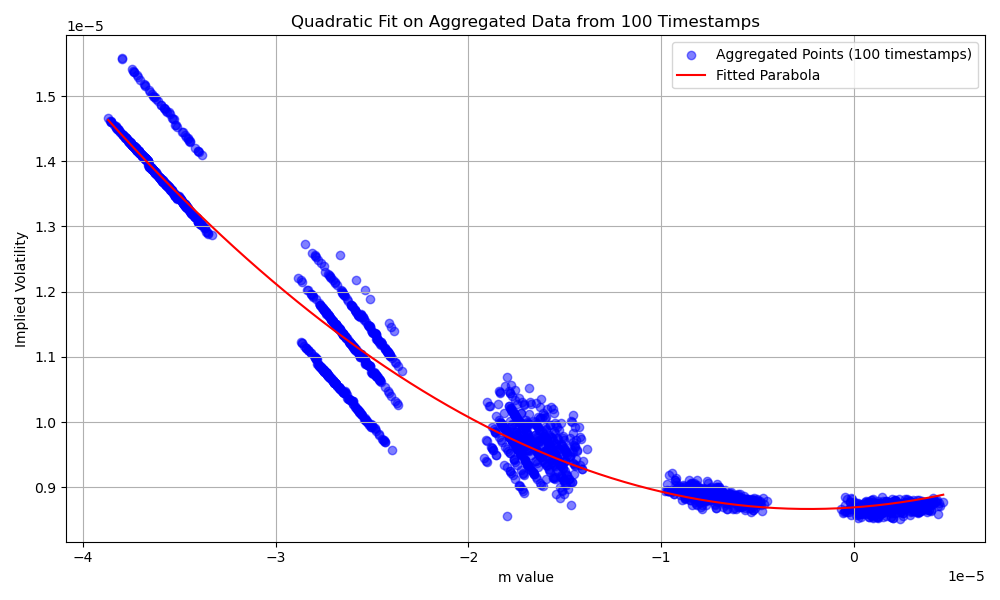

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Data Loading and Preprocessing ---
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

K_dict = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500
}

product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# --- 2. Determine Common Timestamps ---
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# Optionally, reduce clutter (e.g., take every 2nd timestamp).
skip_factor = 2
common_times = common_times[::skip_factor]

# Restrict each product's dataframe to only include rows at these common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 3. Aggregate Data from 100 Timestamps and Fit One Parabola ---
group_size = 500  # Number of timestamps to aggregate; each contributes 5 points (ideally 500 points total)
if len(common_times) < group_size:
    print("Not enough timestamps to form a group of 100.")
else:
    # Initialize lists for aggregated m and iv values.
    m_group = []
    iv_group = []
    
    # Process the first group (first 100 timestamps)
    for ts in common_times[:group_size]:
        for product in selected_products:
            strike = K_dict[product]
            df_ts = product_data[product].loc[product_data[product].index == ts]
            if df_ts.empty:
                continue
            # Calculate m_t = log(strike/mid_price) / sqrt(time_to_maturity).
            m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
            m_t_rep = m_t_vals.mean()  # Representative m_t value for this product at this timestamp.
            iv_rep = df_ts["implied_vol"].mean()  # Representative implied vol.
            m_group.append(m_t_rep)
            iv_group.append(iv_rep)
    
    m_group = np.array(m_group)
    iv_group = np.array(iv_group)
    
    # Fit a quadratic (degree 2 polynomial) to the aggregated 500 points.
    coeffs = np.polyfit(m_group, iv_group, 2)  # Fits a*x^2 + b*x + c.
    poly = np.poly1d(coeffs)
    
    # Derive the vertex (m value and implied vol at vertex).
    if coeffs[0] == 0:
        vertex_m = np.nan
        vertex_iv = np.nan
    else:
        vertex_m = -coeffs[1] / (2 * coeffs[0])
        vertex_iv = poly(vertex_m)
    
    # Output the results.
    print("Fitted quadratic coefficients:", coeffs)
    print("Vertex m value: {:.4f}".format(vertex_m))
    print("Implied Volatility at vertex: {:.4f}".format(vertex_iv))
    
    # --- 4. Plot the Aggregated Data and the Fitted Parabola ---
    plt.figure(figsize=(10, 6))
    plt.scatter(m_group, iv_group, color='blue', alpha=0.5, label='Aggregated Points (100 timestamps)')
    
    # Generate a smooth range of m values for plotting the fitted curve.
    m_fit = np.linspace(min(m_group), max(m_group), 200)
    plt.plot(m_fit, poly(m_fit), color='red', label='Fitted Parabola')
    
    plt.xlabel('m value')
    plt.ylabel('Implied Volatility')
    plt.title('Quadratic Fit on Aggregated Data from 100 Timestamps')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# --- 1. Data Loading and Preprocessing ---
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

K_dict = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500
}

product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# --- 2. Determine Common Timestamps ---
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# Optionally, reduce the number of timestamps (e.g., take every 2nd timestamp).
#skip_factor = 2
# common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 3. Prepare Bins and the Interactive Function ---
group_size = 10  # Number of timestamps per bin.
nbins = len(common_times) // group_size  # Number of complete bins.

def plot_bin(bin_index):
    # Get the timestamps for the selected bin.
    start = bin_index * group_size
    end = start + group_size
    bin_timestamps = common_times[start:end]
    
    # Aggregate the m and iv values over the timestamps within the bin.
    m_bin = []
    iv_bin = []
    for ts in bin_timestamps:
        for product in selected_products:
            strike = K_dict[product]
            df_ts = product_data[product].loc[product_data[product].index == ts]
            if df_ts.empty:
                continue
            # Calculate m_t = log(strike/mid_price) / sqrt(time_to_maturity)
            m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
            m_t_rep = m_t_vals.mean()
            iv_rep = df_ts["implied_vol"].mean()
            m_bin.append(m_t_rep)
            iv_bin.append(iv_rep)
    
    m_bin = np.array(m_bin)
    iv_bin = np.array(iv_bin)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(m_bin, iv_bin, color='blue', alpha=0.5, label=f'Aggregated Points ({group_size} timestamps)')
    
    if len(m_bin) >= 3:
        coeffs = np.polyfit(m_bin, iv_bin, 2)  # Fit quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        # Generate values for plotting the fit.
        m_fit = np.linspace(m_bin.min(), m_bin.max(), 200)
        ax.plot(m_fit, poly(m_fit), color='red', label='Fitted Parabola')
        # Calculate the vertex.
        if coeffs[0] != 0:
            vertex_m = -coeffs[1] / (2 * coeffs[0])
            vertex_iv = poly(vertex_m)
            title_str = (f'Bin {bin_index} / {nbins-1} | Vertex m: {vertex_m:.4f}, '
                         f'IV at vertex: {vertex_iv:.4f}')
        else:
            title_str = f'Bin {bin_index} / {nbins-1} | Cannot determine vertex (zero quadratic coefficient)'
    else:
        title_str = f'Bin {bin_index} / {nbins-1} | Not enough points for fit'
    
    ax.set_xlabel('m value')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(title_str)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Create the slider for bin selection.
interact(plot_bin, bin_index=widgets.IntSlider(min=0, max=nbins-1, step=1, value=0, description='Bin Index'))

interactive(children=(IntSlider(value=0, description='Bin Index', max=173), Output()), _dom_classes=('widget-i…

<function __main__.plot_bin(bin_index)>

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

# --- 1. Data Loading and Preprocessing ---
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750',
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

K_dict = {
    'VOLCANIC_ROCK_VOUCHER_9500': 9500,
    'VOLCANIC_ROCK_VOUCHER_9750': 9750,
    'VOLCANIC_ROCK_VOUCHER_10000': 10000,
    'VOLCANIC_ROCK_VOUCHER_10250': 10250,
    'VOLCANIC_ROCK_VOUCHER_10500': 10500
}

product_data = {}
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=False)
    df = df.dropna(subset=["implied_vol", "delta", "mid_price", "time_to_maturity"])
    df = df[(df['delta'] != 0) & (df['implied_vol'] != 1e-07)]
    # Convert the index to numeric.
    df.index = pd.to_numeric(df.index)
    product_data[product] = df

# --- 2. Determine Common Timestamps ---
common_times = None
for df in product_data.values():
    unique_times = set(df.index.unique())
    if common_times is None:
        common_times = unique_times
    else:
        common_times = common_times.intersection(unique_times)
common_times = sorted(list(common_times))

# If desired, reduce the number of timestamps (e.g., take every 2nd timestamp).
# skip_factor = 2
# common_times = common_times[::skip_factor]

# Restrict each voucher's dataframe to the common timestamps.
for product in product_data:
    product_data[product] = product_data[product].loc[product_data[product].index.isin(common_times)]

# --- 3. Prepare Bins and the Interactive Function ---
group_size = 100  # Number of timestamps per bin.
nbins = len(common_times) // group_size  # Number of complete bins.

def plot_bin(bin_index):
    # Get the timestamps for the selected bin.
    start = bin_index * group_size
    end = start + group_size
    bin_timestamps = common_times[start:end]
    
    # Aggregate the m and iv values over the timestamps within the bin.
    m_bin = []
    iv_bin = []
    for ts in bin_timestamps:
        for product in selected_products:
            strike = K_dict[product]
            df_ts = product_data[product].loc[product_data[product].index == ts]
            if df_ts.empty:
                continue
            # Calculate m_t = log(strike/underlying) / sqrt(time_to_maturity)
            m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
            m_t_rep = m_t_vals.mean()
            iv_rep = df_ts["implied_vol"].mean()
            m_bin.append(m_t_rep)
            iv_bin.append(iv_rep)
    
    m_bin = np.array(m_bin)
    iv_bin = np.array(iv_bin)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(m_bin, iv_bin, color='blue', alpha=0.5, label=f'Aggregated Points ({group_size} timestamps)')
    
    if len(m_bin) >= 3:
        coeffs = np.polyfit(m_bin, iv_bin, 2)  # Fit quadratic: a*x^2 + b*x + c.
        poly = np.poly1d(coeffs)
        # Generate values for plotting the fit.
        m_fit = np.linspace(m_bin.min(), m_bin.max(), 200)
        ax.plot(m_fit, poly(m_fit), color='red', label='Fitted Parabola')
        
        if coeffs[0] != 0:
            vertex_m = -coeffs[1] / (2 * coeffs[0])
            vertex_iv = poly(vertex_m)
            title_str = (
                f'Bin {bin_index} / {nbins-1}\n'
                f'Coeffs: a={coeffs[0]:.4e}, b={coeffs[1]:.4e}, c={coeffs[2]:.4e}\n'
                f'Vertex m: {vertex_m:.4f}, IV at vertex: {vertex_iv:.4f}'
            )
            # Mark the vertex on the plot.
            ax.plot(vertex_m, vertex_iv, 'ks', markersize=10, label='Vertex')
        else:
            title_str = (
                f'Bin {bin_index} / {nbins-1}\n'
                f'Coeffs: a={coeffs[0]:.4e}, b={coeffs[1]:.4e}, c={coeffs[2]:.4e}\n'
                f'Cannot determine vertex (zero quadratic coefficient)'
            )
    else:
        title_str = f'Bin {bin_index} / {nbins-1} | Not enough points for fit'
    
    ax.set_xlabel('m value')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(title_str)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Create the slider for bin selection.
interact(plot_bin, bin_index=widgets.IntSlider(min=0, max=nbins-1, step=1, value=0, description='Bin Index'))

interactive(children=(IntSlider(value=0, description='Bin Index', max=173), Output()), _dom_classes=('widget-i…

<function __main__.plot_bin(bin_index)>

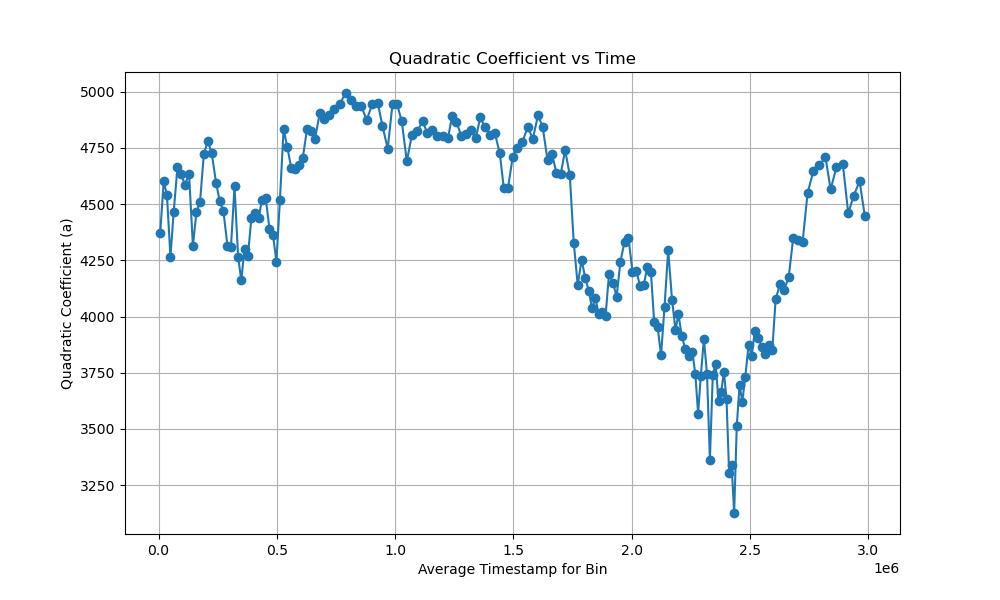

In [219]:
# --- Compute quadratic coefficients for each bin ---
bin_times = []  # average timestamp in each bin
coefs_a = []    # quadratic coefficients from the fit

for bin_index in range(nbins):
    start = bin_index * group_size
    end = start + group_size
    bin_timestamps = common_times[start:end]

    m_bin = []
    iv_bin = []
    for ts in bin_timestamps:
        for product in selected_products:
            strike = K_dict[product]
            df_ts = product_data[product].loc[product_data[product].index == ts]
            if df_ts.empty:
                continue
            # Compute m_t = log(strike/underlying)/sqrt(time_to_maturity)
            m_t_vals = np.log(strike / df_ts["underlying"]) / np.sqrt(df_ts["time_to_maturity"])
            m_t_rep = m_t_vals.mean()
            iv_rep = df_ts["implied_vol"].mean()
            m_bin.append(m_t_rep)
            iv_bin.append(iv_rep)
    
    m_bin = np.array(m_bin)
    iv_bin = np.array(iv_bin)
    
    # Define a representative time for the bin (here using the average timestamp)
    avg_time = np.mean(bin_timestamps)
    bin_times.append(avg_time)
    
    # If there are enough points, fit a quadratic and record the quadratic coefficient.
    if len(m_bin) >= 3:
        coeffs = np.polyfit(m_bin, iv_bin, 2)
        coefs_a.append(coeffs[0])  # coeffs[0] is the quadratic coefficient "a"
    else:
        coefs_a.append(np.nan)  # Not enough points for a fit

# --- Plot the coefficient vs time ---
plt.figure(figsize=(10, 6))
plt.plot(bin_times, coefs_a, marker='o', linestyle='-')
plt.xlabel('Average Timestamp for Bin')
plt.ylabel('Quadratic Coefficient (a)')
plt.title('Quadratic Coefficient vs Time')
plt.grid(True)
plt.show()

In [241]:
x_value = [-4.480620204762098e-05, -3.318833334250511e-05, -2.1864619726659536e-05, -1.0820532751440609e-05, -4.259442859405293e-08] 
y_value = [1.7015371899306773e-05, 1.3001169814169408e-05, 1.1875881784316152e-05, 1.0747104368591683e-05, 1.0356678495812232e-05]
x_value.extend([-4.49557002696858e-05, -3.333771535857445e-05, -2.201388847897578e-05, -1.0969691036927389e-05, -1.9164490936348776e-07])
y_value.extend([1.8443102678656575e-05, 1.4161517684534196e-05, 1.162937769237906e-05, 1.0753349201194945e-05, 1.0380064438167029e-05])
x_value.extend([-4.519027348952448e-05, -3.3572172368930635e-05, -2.224823222218002e-05, -1.1203924309987298e-05, -4.257703744711203e-07] )
y_value.extend([1.7145024525374173e-05, 1.3134212785959246e-05, 1.2604297655820849e-05, 1.0812135670077987e-05, 1.039718591666315e-05])
x_value.extend([-4.519072551656683e-05, -3.35725081830032e-05, -2.2248454765701717e-05, -1.1204036380049668e-05, -4.2577463334605574e-07] )
y_value.extend([6.343750000000001e-06, 1.3134344529360533e-05, 1.233583670249209e-05, 1.0812243828061038e-05, 1.0397289934405127e-05])
x_value.extend([-4.4957049325175004e-05, -3.333871577515416e-05, -2.2014549083902704e-05, -1.0970020221476166e-05, -1.9165066034980106e-07] )
y_value.extend([6.343750000000001e-06, 1.4161942501179877e-05, 1.1629726589098575e-05, 1.0753671907400715e-05, 1.0380375933158215e-05])
x_value.extend([-4.4957499037327585e-05, -3.333904926736196e-05, -2.2014769298761226e-05, -1.0970129956244835e-05, -1.9165257746029438e-07] )
y_value.extend([1.7066538207978007e-05, 1.4162084106728436e-05, 1.1629842981044205e-05, 1.075377948388923e-05, 1.0380479764821941e-05])
x_value.extend([-4.472369322624655e-05, -3.3105127232848405e-05, -2.1780733983498856e-05, -1.0735984157577127e-05, 4.2601042101224393e-08] )
y_value.extend([1.6987626887857914e-05, 1.2972405838221313e-05, 1.1838632454071195e-05, 1.0692394385719673e-05, 1.035828658405226e-05])
x_value.extend([-4.4660230810876396e-05, -3.304154859055775e-05, -2.171704205705984e-05, -1.0672181744417065e-05, 1.0651127939080046e-07] )
y_value.extend([6.343750000000001e-06, 1.4052071295678615e-05, 1.2095342658925802e-05, 1.0739841780997812e-05, 1.0438775103422817e-05])
x_value.extend([-4.449020505603301e-05, -3.2871406605305724e-05, -2.1546786784259668e-05, -1.0501815981579975e-05, 2.769848695933684e-07] )
y_value.extend([6.343750000000001e-06, 1.289135015234351e-05, 1.1425274693127724e-05, 1.0628340739361013e-05, 1.0330876839091069e-05])


In [242]:
x_value

[-4.480620204762098e-05,
 -3.318833334250511e-05,
 -2.1864619726659536e-05,
 -1.0820532751440609e-05,
 -4.259442859405293e-08,
 -4.49557002696858e-05,
 -3.333771535857445e-05,
 -2.201388847897578e-05,
 -1.0969691036927389e-05,
 -1.9164490936348776e-07,
 -4.519027348952448e-05,
 -3.3572172368930635e-05,
 -2.224823222218002e-05,
 -1.1203924309987298e-05,
 -4.257703744711203e-07,
 -4.519072551656683e-05,
 -3.35725081830032e-05,
 -2.2248454765701717e-05,
 -1.1204036380049668e-05,
 -4.2577463334605574e-07,
 -4.4957049325175004e-05,
 -3.333871577515416e-05,
 -2.2014549083902704e-05,
 -1.0970020221476166e-05,
 -1.9165066034980106e-07,
 -4.4957499037327585e-05,
 -3.333904926736196e-05,
 -2.2014769298761226e-05,
 -1.0970129956244835e-05,
 -1.9165257746029438e-07,
 -4.472369322624655e-05,
 -3.3105127232848405e-05,
 -2.1780733983498856e-05,
 -1.0735984157577127e-05,
 4.2601042101224393e-08,
 -4.4660230810876396e-05,
 -3.304154859055775e-05,
 -2.171704205705984e-05,
 -1.0672181744417065e-05,
 1.06

In [234]:
x_value = [-4.488644041419918e-05, -3.326984974493668e-05, -2.1947381806104885e-05, -1.0904509747277335e-05, -1.2775706285996972e-07, -4.5184850222824876e-05, -3.356814338591322e-05, -2.224556222070363e-05, -1.1202579731498979e-05, -4.257192779382772e-07, -4.531294016251009e-05, -3.3696117154464024e-05, -2.2373422759479754e-05, -1.1330329836585041e-05, -5.533616106477772e-07]
y_value = [1.7042251274734734e-05, 1.4900383431464435e-05, 1.1254204490967095e-05, 1.0801176289143042e-05, 1.0460614177281967e-05, 1.7142966499924658e-05, 1.5015254373475911e-05, 1.3092424541991202e-05, 1.0810838123178113e-05, 1.0395938168955037e-05, 1.718618950024247e-05, 1.5064513007923961e-05, 1.2101988443639128e-05, 1.0892472372855993e-05, 1.0441965717403218e-05]


In [243]:
#x_value = [4.531294016251009e-05, 3.369611715446406e-05, 2.2373422759479707e-05, 1.1330329836585072e-05, 5.533616106477807e-07, 4.5504784067128094e-05, 3.388784488446236e-05, 2.2565037256306237e-05, 1.1521833896408306e-05, 7.447578948610997e-07]
#y_value = [1.718618950024247e-05, 1.5064513007923961e-05, 1.2101988443639128e-05, 1.0892472372855993e-05, 1.0441965717403218e-05, 1.725089411810041e-05, 1.4364575575292113e-05, 1.2478535925969482e-05, 1.07305192141328e-05, 1.0401167316688225e-05]
coeffs = np.polyfit(x_value, y_value, 2)
coeffs


array([-1.43709783e+03, -1.26462337e-01,  1.00570224e-05])

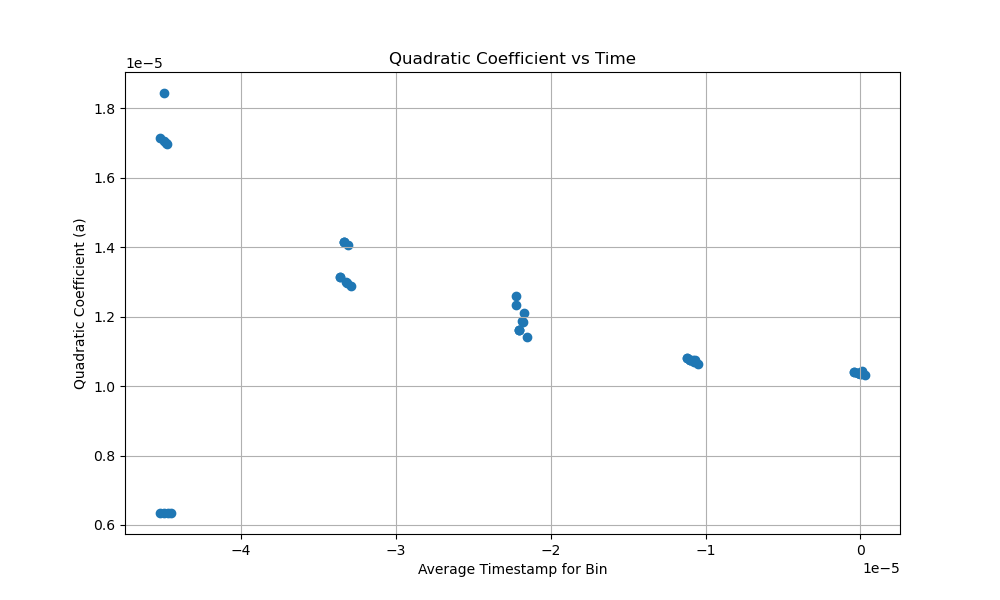

In [244]:
plt.figure(figsize=(10, 6))
plt.scatter(x_value, y_value)
plt.xlabel('Average Timestamp for Bin')
plt.ylabel('Quadratic Coefficient (a)')
plt.title('Quadratic Coefficient vs Time')
plt.grid(True)
plt.show()